# **Solarlytics: Solar Energy Fault Detection, Analysis and Energy Forecasting**

---

![Image Description](./Solarlytics.png)

---


## **Table of Contents**

i. [**Introduction**](#introduction)  

ii. [**Dataset Overview**](#dataset-overview)  
   - [Plant-1 Data Information](#plant-1-data-information)  
   - [Plant-2 Data Information](#plant-2-data-information)  

iii. [**Problem Statement**](#problem-statement)  

iv. [**Key Objectives**](#key-objectives)  

v. [**Methodology**](#methodology)  
   1. [Data Preprocessing](#data-preprocessing)  
      - Import Libraries and Dataset  
      - Data Cleaning and Integration  
      - Correlation Analysis  
   2. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)  
      - Trend Analysis (34-Day and 1-Day)  
      - DC Power Trends and Visualization  
   3. [Technical Fault Analysis](#technical-fault-analysis)  
      - Underperforming Inverters  
      - Non-operational Periods  
      - Fault Sources and Date Analysis  
   4. [Outlier Detection](#outlier-detection)  
   5. [Feature Scaling](#feature-scaling)  
   6. [Machine Learning Models](#machine-learning-models)  
      - Linear Regression  
      - Random Forest Regressor Model  
      - XGBoost Model with Hyperparameter Tuning Using GridSearchCV  
      - Random Forest Model Optimization with RandomizedSearchCV and Custom R² Logging  
      - Optimized Random Forest Regressor with Optuna Hyperparameter Tuning  

vi. [**Evaluation and Comparison**](#evaluation-and-comparison)  
   - [Critical Analysis & Model Ranking](#critical-analysis-and-model-ranking)  
   - [Suggestions for Further Improvement](#suggestions-for-further-improvement)  

vii. [**Conclusion**](#conclusion)


---

## i. 🌞 **Introduction**  
The demand for renewable energy, particularly solar power, is surging worldwide. Efficient energy management is crucial to balance the fluctuating availability of solar energy with consumption demands. This project analyzes data from **solar power plants** with the goal of predicting future power generation and exploring how data science techniques can provide accurate forecasts of solar power yield to aid energy grid management and optimization.

---

## ii. 📊 **Dataset Overview**  
The analysis is based on two main datasets:
1. **Plant_2_Generation_Data.csv**
2. **Plant_2_Weather_Sensor_Data.csv**

#### **Plant_2_Generation_Data.csv**
This dataset contains power generation information from the solar plant. The columns in this dataset are:
- **DATE_TIME**: Timestamp of each observation, recorded every 15 minutes.
- **PLANT_ID**: Identifier for the solar plant.
- **SOURCE_KEY**: Identifier for the inverter generating the power.
- **DC_POWER**: DC power output (in kW) during each 15-minute observation period.
- **AC_POWER**: AC power output (in kW) generated during each 15-minute observation period.
- **DAILY_YIELD**: Cumulative total power generated for the day.
- **TOTAL_YIELD**: Total energy generated since the inverter’s operation began.

#### **Plant_2_Weather_Sensor_Data.csv**
This dataset contains weather data collected from a sensor panel in the plant. The features include:
- **DATE_TIME**: Timestamp of each observation, recorded at 15-minute intervals.
- **PLANT_ID**: Identifier for the plant where data was collected.
- **SOURCE_KEY**: Identifier for the weather sensor panel (single value for all rows).
- **AMBIENT_TEMPERATURE**: Ambient temperature in Celsius.
- **MODULE_TEMPERATURE**: Temperature of the solar panel module in Celsius.
- **IRRADIATION**: Solar radiation received at the plant (kW/m²).

---

## iii. 🛠️ **Key Objectives**  
- To develop a **robust predictive pipeline** for solar energy yield forecasting.  
- To apply and evaluate multiple models for their accuracy and efficiency in forecasting.  
- To highlight how temporal data patterns can be leveraged for future prediction using **machine learning**.

---

## iv. 🧩 **Problem Statement**  

⚠️ Solar energy production is influenced by multiple factors like weather conditions, geographic location, and time of day, leading to high variability.  
💡 **Challenge:** Predicting solar power yield accurately to optimize energy distribution, reduce wastage, and meet energy demands efficiently.  

---

## v. 🚀 **Methodology**  
1. 🔍 **Data Preprocessing**  
   - Import Libraries and Dataset  
   - Data Cleaning and Integration  
   - Correlation Analysis  

2. 📈 **Exploratory Data Analysis (EDA)**  
   - Trend Analysis (34-Day and 1-Day)  
   - DC Power Trends and Visualization  

3. ⚡ **Technical Fault Analysis**  
   - Underperforming Inverters  
   - Non-operational Periods  
   - Fault Sources and Date Analysis  

4. 🚨 **Outlier Detection**  

5. 🎛️ **Feature Scaling**  

6. 🤖 **Machine Learning Models**  
   - Linear Regression  
   - Random Forest Regressor Model  
   - XGBoost Model with Hyperparameter Tuning Using GridSearchCV  
   - Random Forest Model Optimization with RandomizedSearchCV and Custom R² Logging  
   - Optimized Random Forest Regressor with Optuna Hyperparameter Tuning  

---

## vi. 📊 **Evaluation and Comparison**  
- Measure model performance with metrics like **Mean Squared Error (MSE)**, **Root Mean Squared Error (RMSE)**, **Mean Absolute Error (MAE)**, and **R² Score**.  
- Visualize and compare the results of all models.

---

## vii. 🏁 **Conclude Findings**  
- Provide actionable insights and recommendations based on the project outcomes.  

---



## **1:Data Preprocessing**

#### **Import Libraries:**

In [9]:
# Data manipulation
import pandas as pd
import numpy as np

#Date & Time
import datetime as dt
#Stats
import scipy.stats as stats

# Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# LSTM model for time series forecasting (Keras)
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import LSTM, Dense, Dropout

# Preprocessing
from sklearn.preprocessing import StandardScaler

#### **Import Dataset:**

In [10]:
gen_1 = pd.read_csv('C:/Users/User/OneDrive - National University of Sciences & Technology/Projects/Ongoing/SolarPowerGeneration/Plant_1_Generation_Data.csv')
gen_2 = pd.read_csv('C:/Users/User/OneDrive - National University of Sciences & Technology/Projects/Ongoing/SolarPowerGeneration/Plant_2_Generation_Data.csv')
ws_1 = pd.read_csv('C:/Users/User/OneDrive - National University of Sciences & Technology/Projects/Ongoing/SolarPowerGeneration/Plant_1_Weather_Sensor_Data.csv')
ws_2 = pd.read_csv('C:/Users/User/OneDrive - National University of Sciences & Technology/Projects/Ongoing/SolarPowerGeneration/Plant_2_Weather_Sensor_Data.csv')


#### **Plant 1 Data Information:**

In [11]:
print(gen_2.info())
print(gen_2.describe())
gen_2.infer_objects()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB
None
        PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    67698.0  67698.000000  67698.000000  67698.000000  6.769800e+04
mean   4136001.0    246.701961    241.277825   3294.890295  6.589448e+08
std          0.0    370.569597    362.112118   2919.448386  7.296678e+08
min    4136001.0      0.000000      0.000000      0.000000  0.000000e+00
25%    4136001.0      0.000000      0.000000    272.750000  1.996494e+07
50%    41

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0      2020-05-15 00:00:00   4136001  4UPUqMRk7TRMgml       0.0       0.0   
1      2020-05-15 00:00:00   4136001  81aHJ1q11NBPMrL       0.0       0.0   
2      2020-05-15 00:00:00   4136001  9kRcWv60rDACzjR       0.0       0.0   
3      2020-05-15 00:00:00   4136001  Et9kgGMDl729KT4       0.0       0.0   
4      2020-05-15 00:00:00   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0   
...                    ...       ...              ...       ...       ...   
67693  2020-06-17 23:45:00   4136001  q49J1IKaHRwDQnt       0.0       0.0   
67694  2020-06-17 23:45:00   4136001  rrq4fwE8jgrTyWY       0.0       0.0   
67695  2020-06-17 23:45:00   4136001  vOuJvMaM2sgwLmb       0.0       0.0   
67696  2020-06-17 23:45:00   4136001  xMbIugepa2P7lBB       0.0       0.0   
67697  2020-06-17 23:45:00   4136001  xoJJ8DcxJEcupym       0.0       0.0   

       DAILY_YIELD   TOTAL_YIELD  
0      9425.000000  2.429011e+06  
1         0.000000  1.215279e+09  
2      3075.333333  2.247720e+09  
3       269.933333  1.704250e+06  
4      3177.000000  1.994153e+07  
...            ...           ...  
67693  4157.000000  5.207580e+05  
67694  3931.000000  1.211314e+08  
67695  4322.000000  2.427691e+06  
67696  4218.000000  1.068964e+08  
67697  4316.000000  2.093357e+08  

[67698 rows x 7 columns]

#### **Plant-2 Data Inforamtion:**

In [12]:
print(ws_2.info())
print(ws_2.describe())
ws_2.infer_objects()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB
None
        PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count     3259.0          3259.000000         3259.000000  3259.000000
mean   4136001.0            28.069400           32.772408     0.232737
std          0.0             4.061556           11.344034     0.312693
min    4136001.0            20.942385           20.265123     0.000000
25%    4136001.0            24.602135           23.716881     0.000000

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0     2020-05-15 00:00:00   4136001  iq8k7ZNt4Mwm3w0            27.004764   
1     2020-05-15 00:15:00   4136001  iq8k7ZNt4Mwm3w0            26.880811   
2     2020-05-15 00:30:00   4136001  iq8k7ZNt4Mwm3w0            26.682055   
3     2020-05-15 00:45:00   4136001  iq8k7ZNt4Mwm3w0            26.500589   
4     2020-05-15 01:00:00   4136001  iq8k7ZNt4Mwm3w0            26.596148   
...                   ...       ...              ...                  ...   
3254  2020-06-17 22:45:00   4136001  iq8k7ZNt4Mwm3w0            23.511703   
3255  2020-06-17 23:00:00   4136001  iq8k7ZNt4Mwm3w0            23.482282   
3256  2020-06-17 23:15:00   4136001  iq8k7ZNt4Mwm3w0            23.354743   
3257  2020-06-17 23:30:00   4136001  iq8k7ZNt4Mwm3w0            23.291048   
3258  2020-06-17 23:45:00   4136001  iq8k7ZNt4Mwm3w0            23.202871   

      MODULE_TEMPERATURE  IRRADIATION  
0              25.060789          0.0  
1              24.421869          0.0  
2              24.427290          0.0  
3              24.420678          0.0  
4              25.088210          0.0  
...                  ...          ...  
3254           22.856201          0.0  
3255           22.744190          0.0  
3256           22.492245          0.0  
3257           22.373909          0.0  
3258           22.535908          0.0  

[3259 rows x 6 columns]

Identify Source Keys number (Inverters)

In [27]:
print('Number of unique SOURCE_KEY values in P1_Gen_data :',len(gen_1.SOURCE_KEY.unique()))
print('Number of unique SOURCE_KEY values in P2_Gen_data :',len(gen_1.SOURCE_KEY.unique()))

Number of unique SOURCE_KEY values in P1_Gen_data : 22
Number of unique SOURCE_KEY values in P2_Gen_data : 22


#### **Data Integration:**

In [13]:
# Adjust PLANT_ID to 2 for both datasets
gen_2['PLANT_ID'] = 2
ws_2['PLANT_ID'] = 2

# Merge both datasets on 'DATE_TIME'
plant_2 = pd.merge(gen_2, ws_2, on='DATE_TIME', how='inner')

# Format DATE_TIME and encode SOURCE_KEY
plant_2['DATE_TIME'] = pd.to_datetime(plant_2['DATE_TIME']).dt.strftime('%d-%m-%Y %H:%M:%S')
plant_2['Inverter_no'] = plant_2['SOURCE_KEY_x'].astype('category').cat.codes + 1  # Encode SOURCE_KEY as 1-22

# Drop unnecessary columns and rename
plant_2.drop(['PLANT_ID_y', 'SOURCE_KEY_x'], axis=1, inplace=True)
plant_2.rename(columns={'PLANT_ID_x': 'PLANT_ID', 'SOURCE_KEY_y': 'MODULE_NO'}, inplace=True)
plant_2['MODULE_NO'] = 2  # Assign all MODULE_NO values:2 as all values of sensor data come from a single module

# Reorder columns to place Inverter_no after PLANT_ID
cols = ['DATE_TIME', 'PLANT_ID', 'Inverter_no'] + [col for col in plant_2.columns if col not in ['DATE_TIME', 'PLANT_ID', 'Inverter_no']]
plant_2 = plant_2[cols]

# Save to a new CSV file
plant_2.to_csv('C:/Users/User/OneDrive - National University of Sciences & Technology/Projects/Ongoing/SolarPowerGeneration/Plant_2_Merged_Data.csv', index=False)

# Check the dataset
print(plant_2.info())
print(plant_2.describe())
plant_2.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            67698 non-null  object 
 1   PLANT_ID             67698 non-null  int64  
 2   Inverter_no          67698 non-null  int8   
 3   DC_POWER             67698 non-null  float64
 4   AC_POWER             67698 non-null  float64
 5   DAILY_YIELD          67698 non-null  float64
 6   TOTAL_YIELD          67698 non-null  float64
 7   MODULE_NO            67698 non-null  int64  
 8   AMBIENT_TEMPERATURE  67698 non-null  float64
 9   MODULE_TEMPERATURE   67698 non-null  float64
 10  IRRADIATION          67698 non-null  float64
dtypes: float64(7), int64(2), int8(1), object(1)
memory usage: 5.2+ MB
None
       PLANT_ID   Inverter_no      DC_POWER      AC_POWER   DAILY_YIELD  \
count   67698.0  67698.000000  67698.000000  67698.000000  67698.000000   
mean        2.0

DATE_TIME  PLANT_ID  Inverter_no  DC_POWER  AC_POWER  \
0  15-05-2020 00:00:00         2            1       0.0       0.0   
1  15-05-2020 00:00:00         2            2       0.0       0.0   
2  15-05-2020 00:00:00         2            3       0.0       0.0   
3  15-05-2020 00:00:00         2            4       0.0       0.0   
4  15-05-2020 00:00:00         2            5       0.0       0.0   

   DAILY_YIELD   TOTAL_YIELD  MODULE_NO  AMBIENT_TEMPERATURE  \
0  9425.000000  2.429011e+06          2            27.004764   
1     0.000000  1.215279e+09          2            27.004764   
2  3075.333333  2.247720e+09          2            27.004764   
3   269.933333  1.704250e+06          2            27.004764   
4  3177.000000  1.994153e+07          2            27.004764   

   MODULE_TEMPERATURE  IRRADIATION  
0           25.060789          0.0  
1           25.060789          0.0  
2           25.060789          0.0  
3           25.060789          0.0  
4           25.060789          0.0

#### **Data Cleaning (Missing Values)**

In [29]:
# Check for missing values
missing_summary = plant_2.isnull().sum()

# Display missing value summary if there are missing values
print("Missing Values Summary:")
print(missing_summary)

if missing_summary.any():
    # Handle missing values: Median for numerical and Mode for categorical columns
    for column in plant_2.columns:
        if plant_2[column].isnull().sum() > 0:  # If column has missing values
            if plant_2[column].dtype in ['float64', 'int64']:
                plant_2[column].fillna(plant_2[column].median(), inplace=True)  # Numerical: Median
            else:
                plant_2[column].fillna(plant_2[column].mode()[0], inplace=True)  # Categorical: Mode

    # Verify no missing values remain
    print("\nMissing Values After Cleaning:")
    print(plant_2.isnull().sum())
else:
    print("No missing values found.")



Missing Values Summary:
DATE_TIME              0
PLANT_ID               0
Inverter_no            0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
MODULE_NO              0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64
No missing values found.


#### **Correlation Analysis:** Relationship between Parameters

**Observation & Analysis:**
The correlation heatmap reveals critical insights for optimizing solar energy systems. DC_POWER and AC_POWER show a perfect positive correlation, indicating efficient conversion of DC to AC power by inverters. IRRADIATION is strongly positively correlated with DC_POWER, AC_POWER, MODULE_TEMPERATURE, and AMBIENT_TEMPERATURE, highlighting the impact of solar irradiation on power output and temperature. The high correlation between MODULE_TEMPERATURE and AMBIENT_TEMPERATURE suggests module temperatures are greatly influenced by the environment, underscoring the need for effective cooling to maintain performance. The relationships between DAILY_YIELD, TOTAL_YIELD, and AMBIENT_TEMPERATURE indicate temperature affects energy production, while the slightly negative correlation with IRRADIATION suggests complex interactions possibly due to shading or weather. Inverter_no shows no significant correlation with other features, acting mainly as an identifier. These findings can inform system design and operational improvements for better efficiency and reliability.

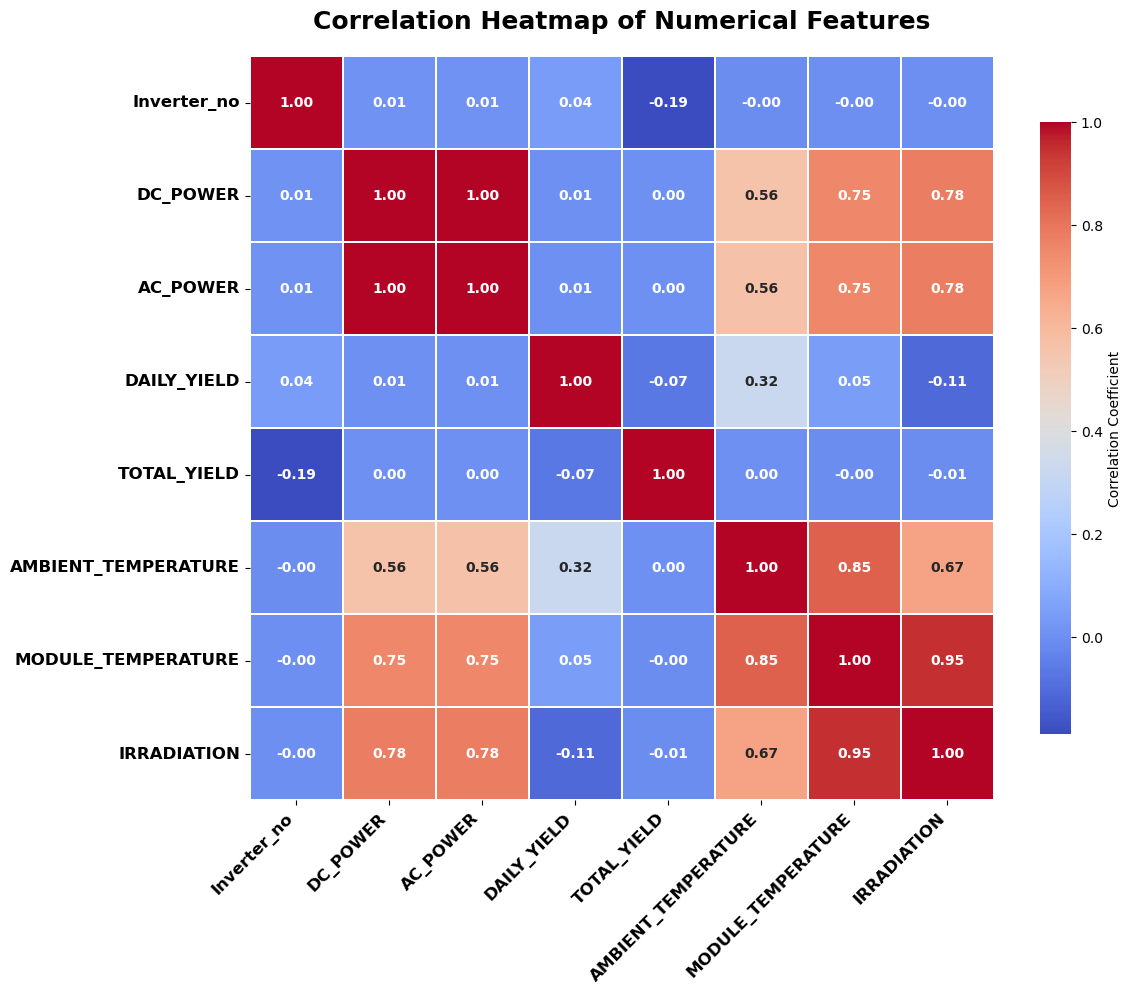

In [11]:
# Heatmap of Correlation

# Exclude non-relevant columns like 'plant_id' and 'module_no'
numeric_columns = [col for col in plant_2.select_dtypes(include=np.number).columns if col not in ['PLANT_ID', 'MODULE_NO']]
corr_df = plant_2[numeric_columns].corr()

# Plot the heatmap with enhanced color palette and styling
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_df, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm",  # Professional, clean, and high-contrast colors
    linewidths=1.2, 
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}, 
    square=True,
    annot_kws={"size": 10, "fontweight": "bold"}  # Enhanced readability for annotations
)

# Add titles and improve layout
plt.title('Correlation Heatmap of Numerical Features', fontsize=18, fontweight='bold', pad=20)
plt.xticks(fontsize=12, rotation=45, ha='right', fontweight="semibold")
plt.yticks(fontsize=12, rotation=0, fontweight="semibold")
plt.tight_layout()
plt.show()


## **2:EDA**

##### **34 Days Parameters Trend Analysis & Visualization:** 


We visualized various key parameters including **DC_POWER**, **AC_POWER**, **AMBIENT_TEMPERATURE**, **MODULE_TEMPERATURE**, and **IRRADIATION** over the 34-day period. This comprehensive analysis reconfirms our earlier findings:

- **DC Power and AC Power** show a **positive correlation** with **Ambient Temperature**, **Module Temperature**, and **Irradiation** during normal operating conditions.
- However, when the **Module Temperature** exceeds a certain threshold (typically around 50°C), the performance of solar panels is negatively impacted. This aligns with literature, which cites thermal losses and efficiency drop-offs at higher temperatures.

The visualizations provide an in-depth view of how these parameters vary over time, supporting the observed correlations.


In [12]:
"""
all_data = plant_2.copy()  # Make a copy to avoid setting with copy warnings

# Convert DATE_TIME to datetime for better plotting
all_data['DATE_TIME'] = pd.to_datetime(all_data['DATE_TIME'], format='%d-%m-%Y %H:%M:%S')

# Set up the figure with separate plots for each variable
fig, ax = plt.subplots(5, 1, figsize=(16, 20), sharex=True, gridspec_kw={'hspace': 0.4})


# Ambient Temperature: Line Plot with Markers
sns.lineplot(x=all_data['DATE_TIME'], y=all_data['AMBIENT_TEMPERATURE'], ax=ax[2], color='green', marker='o', linewidth=2)
ax[2].set_title('Ambient Temperature Over Time', fontsize=14, fontweight='bold')
ax[2].set_ylabel('Ambient Temp (°C)', fontsize=12)

# Module Temperature: Step Plot
ax[3].step(all_data['DATE_TIME'], all_data['MODULE_TEMPERATURE'], where='mid', color='purple', linewidth=2)
ax[3].set_title('Module Temperature Over Time', fontsize=14, fontweight='bold')
ax[3].set_ylabel('Module Temp (°C)', fontsize=12)

# Irradiation: Area Plot
ax[4].fill_between(all_data['DATE_TIME'], all_data['IRRADIATION'], color='gold', alpha=0.6)
ax[4].set_title('Irradiation Over Time', fontsize=14, fontweight='bold')
ax[4].set_ylabel('Irradiation (kW/m²)', fontsize=12)

# DC Power: Line Plot
sns.lineplot(x=all_data['DATE_TIME'], y=all_data['DC_POWER'], ax=ax[0], color='dodgerblue', linewidth=2)
ax[0].set_title('DC Power Over Time', fontsize=14, fontweight='bold')
ax[0].set_ylabel('DC Power (kW)', fontsize=12)

# AC Power: Scatter Plot
sns.scatterplot(x=all_data['DATE_TIME'], y=all_data['AC_POWER'], ax=ax[1], color='orange', s=60, edgecolor='black')
ax[1].set_title('AC Power Over Time', fontsize=14, fontweight='bold')
ax[1].set_ylabel('AC Power (kW)', fontsize=12)

# Common X-axis label
fig.text(0.5, 0.04, 'Time (Hourly)', ha='center', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
for axx in ax:
    axx.tick_params(axis='x', rotation=45)

# Manually adjust layout to avoid tight_layout issues
fig.subplots_adjust(hspace=0.4, bottom=0.1, top=0.95)

# Display the plot
plt.show()

"""

"\nall_data = plant_2.copy()  # Make a copy to avoid setting with copy warnings\n\n# Convert DATE_TIME to datetime for better plotting\nall_data['DATE_TIME'] = pd.to_datetime(all_data['DATE_TIME'], format='%d-%m-%Y %H:%M:%S')\n\n# Set up the figure with separate plots for each variable\nfig, ax = plt.subplots(5, 1, figsize=(16, 20), sharex=True, gridspec_kw={'hspace': 0.4})\n\n\n# Ambient Temperature: Line Plot with Markers\nsns.lineplot(x=all_data['DATE_TIME'], y=all_data['AMBIENT_TEMPERATURE'], ax=ax[2], color='green', marker='o', linewidth=2)\nax[2].set_title('Ambient Temperature Over Time', fontsize=14, fontweight='bold')\nax[2].set_ylabel('Ambient Temp (°C)', fontsize=12)\n\n# Module Temperature: Step Plot\nax[3].step(all_data['DATE_TIME'], all_data['MODULE_TEMPERATURE'], where='mid', color='purple', linewidth=2)\nax[3].set_title('Module Temperature Over Time', fontsize=14, fontweight='bold')\nax[3].set_ylabel('Module Temp (°C)', fontsize=12)\n\n# Irradiation: Area Plot\nax[4].fil

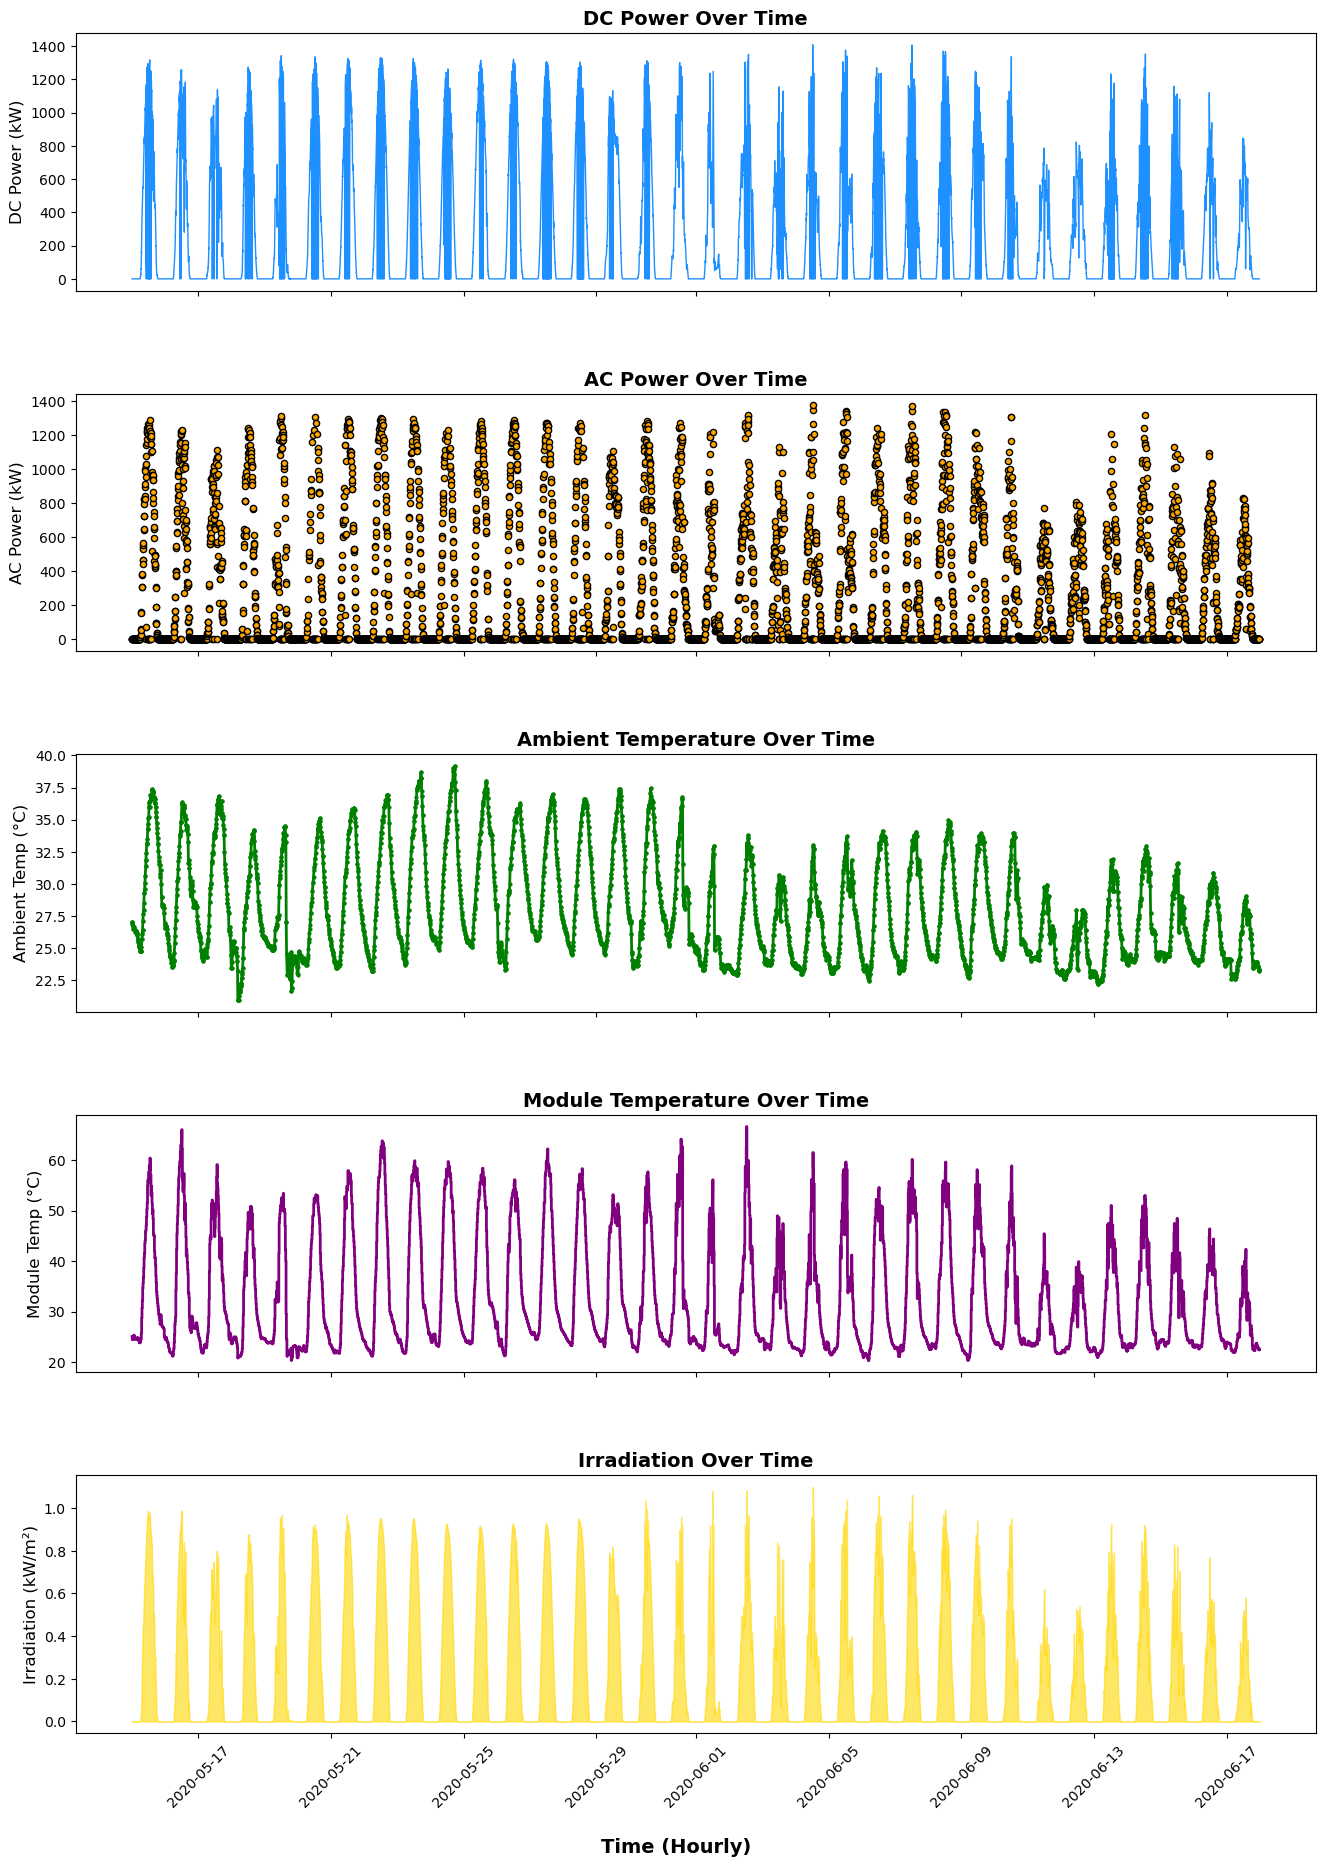

In [14]:
##Fast Plot

# Make a copy to avoid setting with copy warnings
all_data = plant_2.copy()

# Convert DATE_TIME to datetime for better plotting
all_data['DATE_TIME'] = pd.to_datetime(all_data['DATE_TIME'], format='%d-%m-%Y %H:%M:%S')

# Reduce dataset size (optional, sample every nth data point)
all_data = all_data[::10]  # Example: take every 10th row

# Set up the figure with separate plots for each variable
fig, ax = plt.subplots(5, 1, figsize=(16, 20), sharex=True, gridspec_kw={'hspace': 0.4})

# DC Power: Line Plot (faster using matplotlib)
ax[0].plot(all_data['DATE_TIME'], all_data['DC_POWER'], color='dodgerblue', linewidth=1)
ax[0].set_title('DC Power Over Time', fontsize=14, fontweight='bold')
ax[0].set_ylabel('DC Power (kW)', fontsize=12)

# AC Power: Scatter Plot (faster using matplotlib)
ax[1].scatter(all_data['DATE_TIME'], all_data['AC_POWER'], color='orange', s=20, edgecolor='black')  # Reduce marker size
ax[1].set_title('AC Power Over Time', fontsize=14, fontweight='bold')
ax[1].set_ylabel('AC Power (kW)', fontsize=12)

# Ambient Temperature: Line Plot (faster using matplotlib)
ax[2].plot(all_data['DATE_TIME'], all_data['AMBIENT_TEMPERATURE'], color='green', marker='o', markersize=2, linewidth=2)
ax[2].set_title('Ambient Temperature Over Time', fontsize=14, fontweight='bold')
ax[2].set_ylabel('Ambient Temp (°C)', fontsize=12)

# Module Temperature: Step Plot
ax[3].step(all_data['DATE_TIME'], all_data['MODULE_TEMPERATURE'], where='mid', color='purple', linewidth=2)
ax[3].set_title('Module Temperature Over Time', fontsize=14, fontweight='bold')
ax[3].set_ylabel('Module Temp (°C)', fontsize=12)

# Irradiation: Area Plot (use simple plot for faster rendering)
ax[4].fill_between(all_data['DATE_TIME'], all_data['IRRADIATION'], color='gold', alpha=0.6)
ax[4].set_title('Irradiation Over Time', fontsize=14, fontweight='bold')
ax[4].set_ylabel('Irradiation (kW/m²)', fontsize=12)

# Common X-axis label
fig.text(0.5, 0.04, 'Time (Hourly)', ha='center', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
for axx in ax:
    axx.tick_params(axis='x', rotation=45)

# Manually adjust layout to avoid tight_layout issues
fig.subplots_adjust(hspace=0.4, bottom=0.1, top=0.95)

# Display the plot
plt.show()


##### **One Day Parameters Trend Analysis & Visualization::**
One Day Trend Analysis of DC Power, AC Power, Ambient Temperature, Module Temperature, and Irradiation

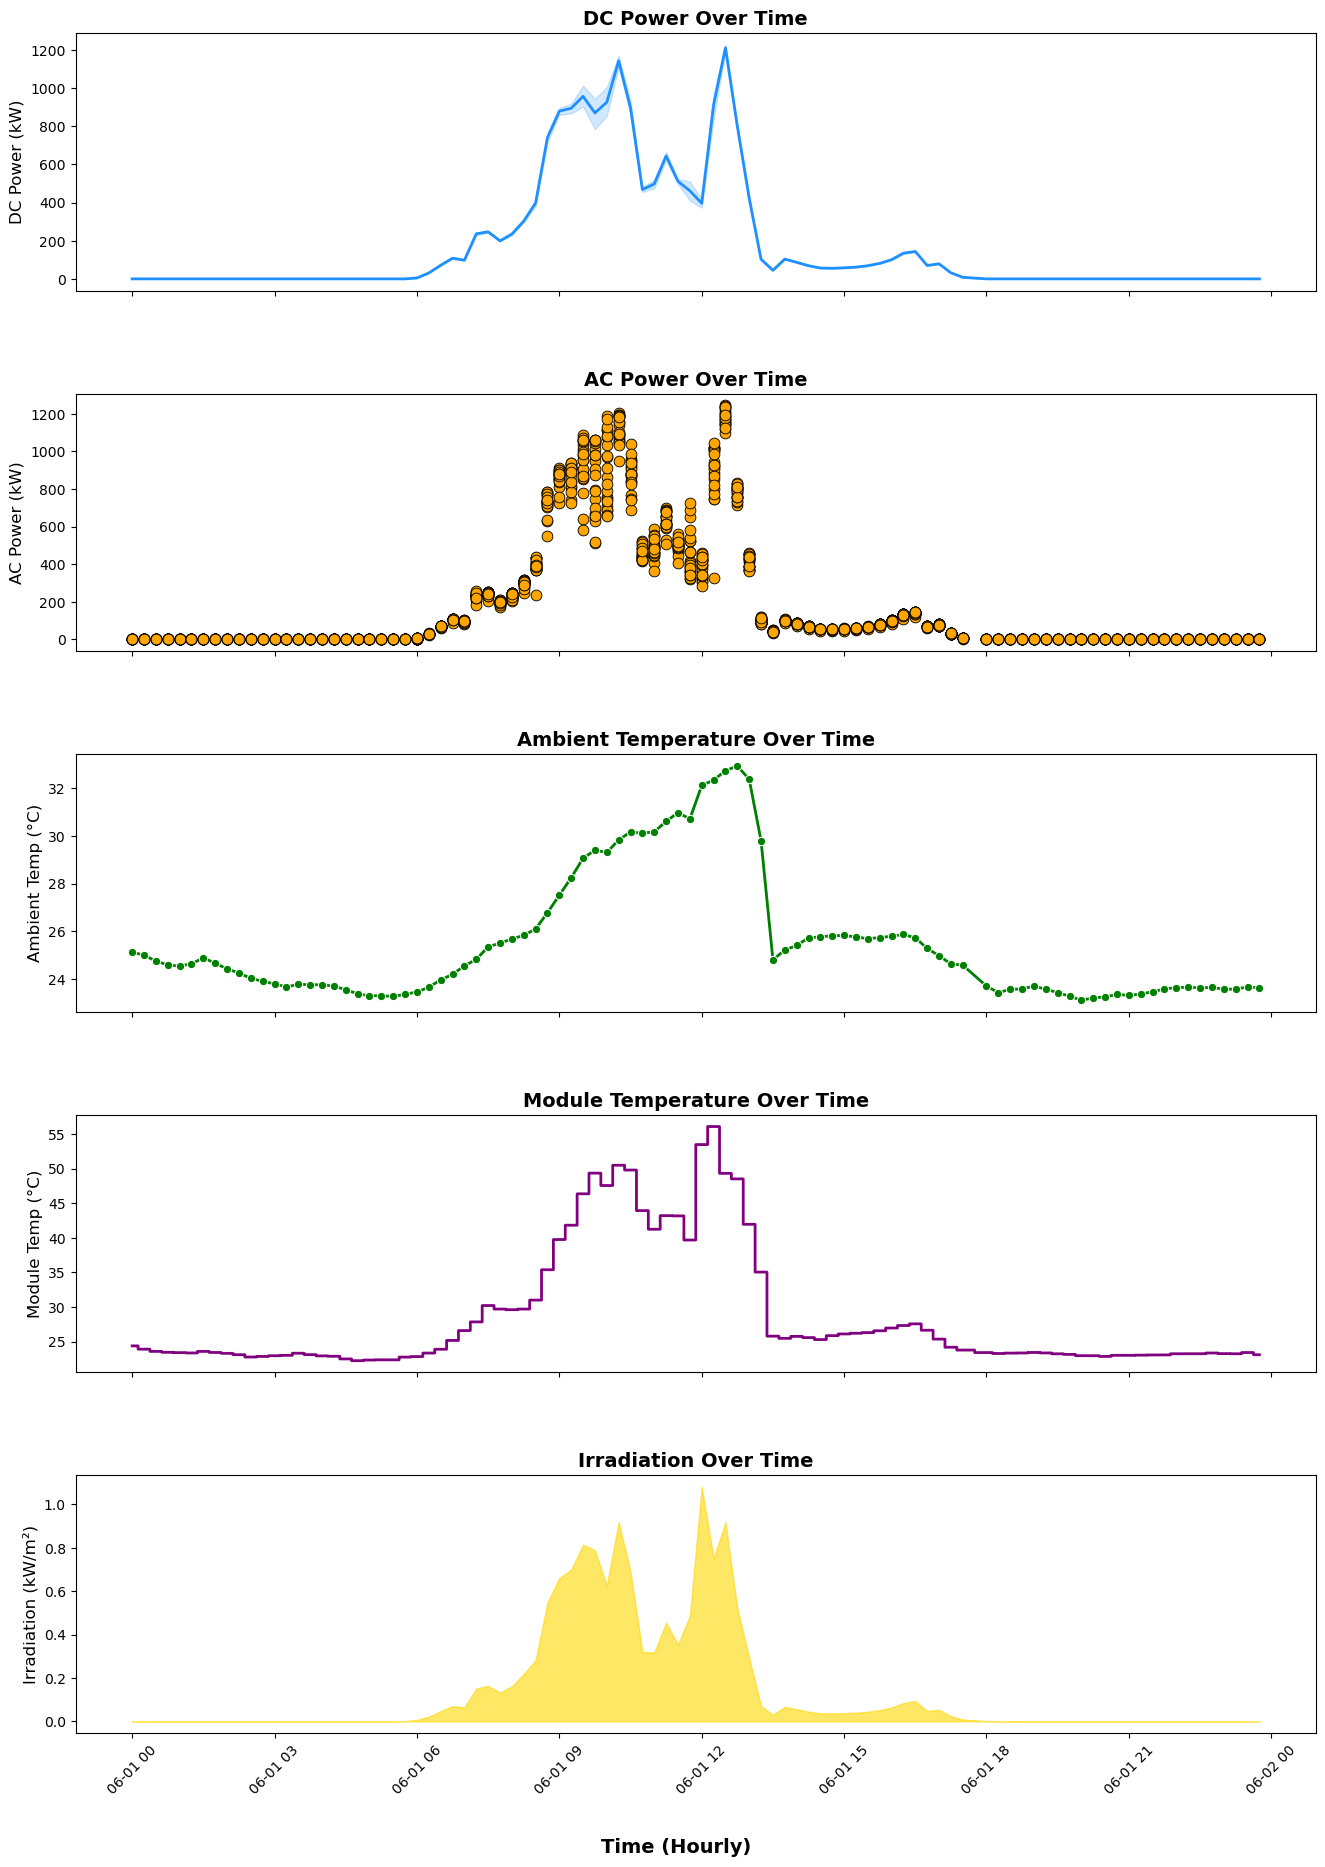

In [14]:

# Filter data for one day (adjust the date as needed)
one_day_data = plant_2[plant_2['DATE_TIME'].str.contains('01-06-2020')].copy()  # Use .copy() to avoid warnings

# Convert DATE_TIME to datetime for better plotting
one_day_data['DATE_TIME'] = pd.to_datetime(one_day_data['DATE_TIME'], format='%d-%m-%Y %H:%M:%S')

# Set up the figure with separate plots for each variable
fig, ax = plt.subplots(5, 1, figsize=(16, 20), sharex=True, gridspec_kw={'hspace': 0.4})

# DC Power: Line Plot
sns.lineplot(x=one_day_data['DATE_TIME'], y=one_day_data['DC_POWER'], ax=ax[0], color='dodgerblue', linewidth=2)
ax[0].set_title('DC Power Over Time', fontsize=14, fontweight='bold')
ax[0].set_ylabel('DC Power (kW)', fontsize=12)

# AC Power: Scatter Plot
sns.scatterplot(x=one_day_data['DATE_TIME'], y=one_day_data['AC_POWER'], ax=ax[1], color='orange', s=60, edgecolor='black')
ax[1].set_title('AC Power Over Time', fontsize=14, fontweight='bold')
ax[1].set_ylabel('AC Power (kW)', fontsize=12)

# Ambient Temperature: Line Plot with Markers
sns.lineplot(x=one_day_data['DATE_TIME'], y=one_day_data['AMBIENT_TEMPERATURE'], ax=ax[2], color='green', marker='o', linewidth=2)
ax[2].set_title('Ambient Temperature Over Time', fontsize=14, fontweight='bold')
ax[2].set_ylabel('Ambient Temp (°C)', fontsize=12)

# Module Temperature: Step Plot
ax[3].step(one_day_data['DATE_TIME'], one_day_data['MODULE_TEMPERATURE'], where='mid', color='purple', linewidth=2)
ax[3].set_title('Module Temperature Over Time', fontsize=14, fontweight='bold')
ax[3].set_ylabel('Module Temp (°C)', fontsize=12)

# Irradiation: Area Plot
ax[4].fill_between(one_day_data['DATE_TIME'], one_day_data['IRRADIATION'], color='gold', alpha=0.6)
ax[4].set_title('Irradiation Over Time', fontsize=14, fontweight='bold')
ax[4].set_ylabel('Irradiation (kW/m²)', fontsize=12)

# Common X-axis label
fig.text(0.5, 0.04, 'Time (Hourly)', ha='center', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
for axx in ax:
    axx.tick_params(axis='x', rotation=45)

# Manually adjust layout to avoid tight_layout issues
fig.subplots_adjust(hspace=0.4, bottom=0.1, top=0.95)

# Display the plot
plt.show()



##### **DC Power Trend for All Inverters (34 days)**

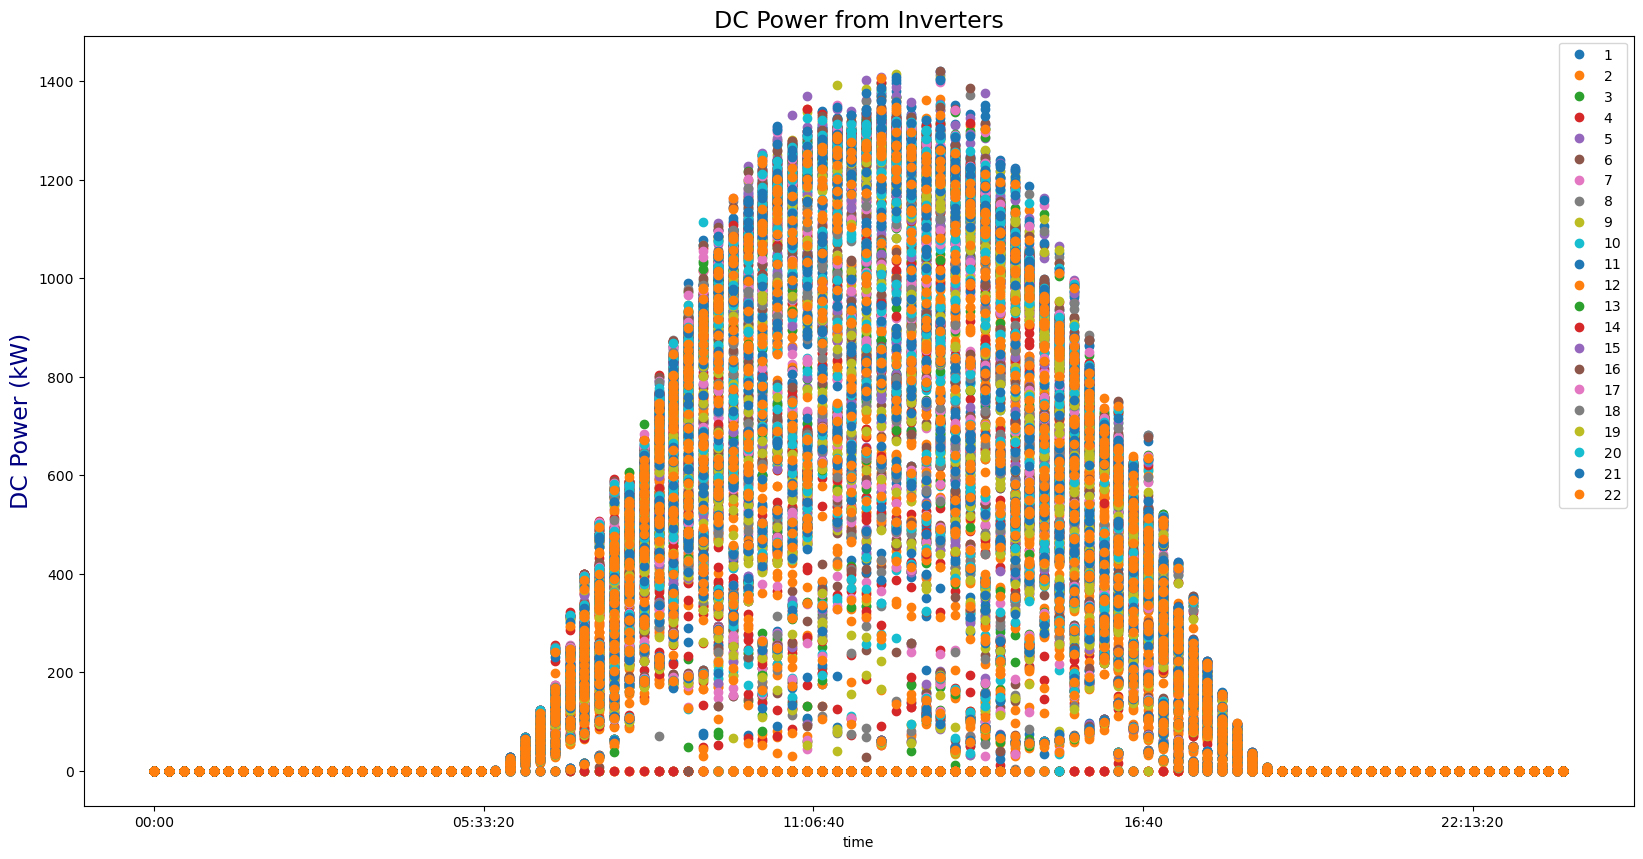

In [15]:
# Convert 'DATE_TIME' to datetime if it's not already in datetime format
plant_2['DATE_TIME'] = pd.to_datetime(plant_2['DATE_TIME'], format='%d-%m-%Y %H:%M:%S')

# Extract time from 'DATE_TIME'
plant_2['time'] = plant_2['DATE_TIME'].dt.time

# Group by 'INVERTER_NUMBER' and plot DC Power for each inverter across the entire dataset
plant_2.set_index('time').groupby('Inverter_no')['DC_POWER'].plot(style='o', legend=True, figsize=(20, 10))

# Customize plot
plt.title('DC Power from Inverters', size=17)
plt.ylabel('DC Power (kW)', color='navy', fontsize=17)
plt.show()


## **3:Technical Fault Analysis:**

### **Under Performing Inverters** 
Inverters 4, 6, 12, and 19 consistently demonstrate substantially lower power generation throughout the day. Moreover, inverters 2, 3, 7, 8, 14, 17, 18, and 22 show reduced output compared to the majority of the inverters, suggesting suboptimal performance in their conversion efficiency and potential issues in their power conversion processes.


Possible **reasons for underperforming inverters** include **shading** from nearby obstructions such as buildings or trees, **faulty equipment** due to hardware malfunctions or poor maintenance, installation issues like improper angling or positioning of the solar panels, degradation of the solar panels and inverters over time, and **temperature effects** where higher temperatures reduce the efficiency of the solar panels. Addressing these factors can help improve the performance of the underperforming inverters and optimize the overall efficiency of the solar energy system.

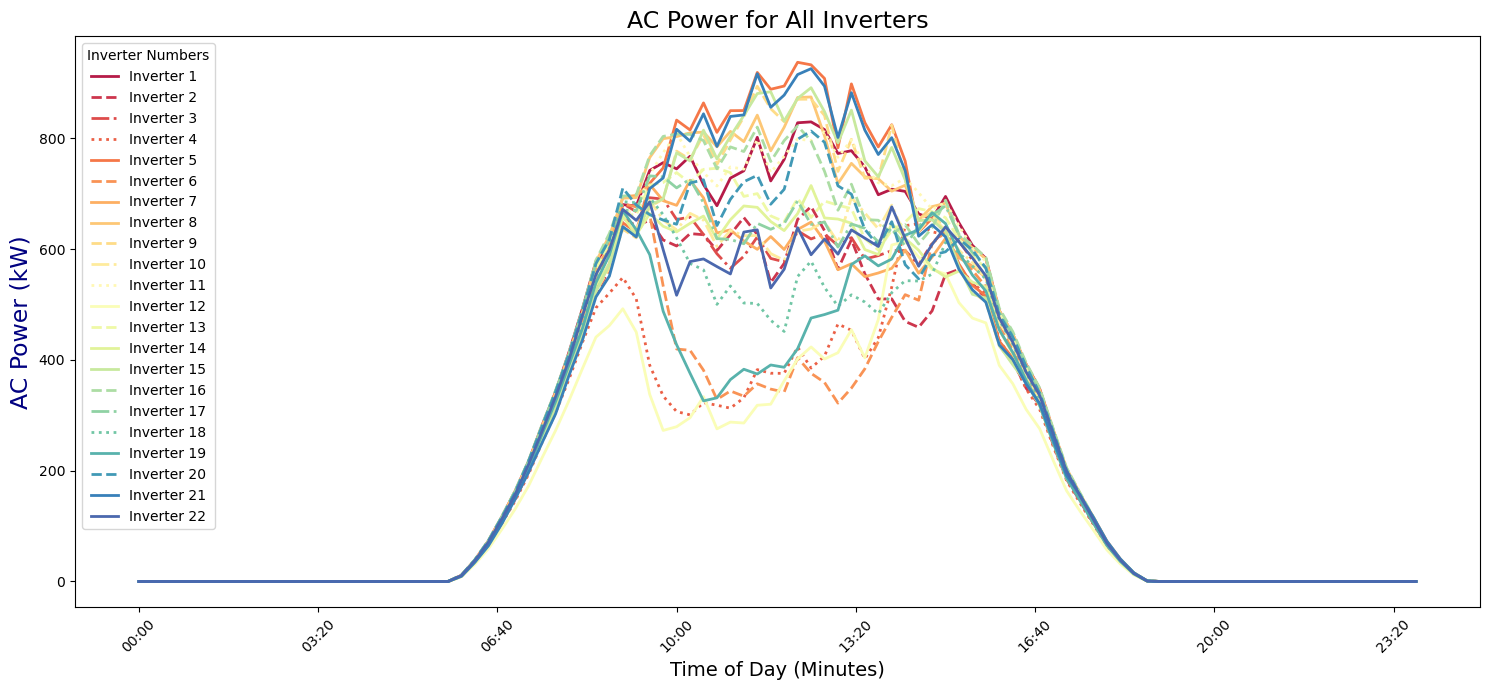

In [16]:
gen = plant_2.copy()

# Ensure 'DATE_TIME' is in datetime format and extract time_numeric (minutes from midnight)
gen['DATE_TIME'] = pd.to_datetime(gen['DATE_TIME'], errors='coerce')
gen['time_numeric'] = gen['DATE_TIME'].dt.hour * 60 + gen['DATE_TIME'].dt.minute

# Group by 'time_numeric' and 'Inverter_no', then calculate the mean DC_POWER
gen_grouped = gen.groupby(['time_numeric', 'Inverter_no'])['AC_POWER'].mean().unstack()

# Set color palette and line styles
cmap = sns.color_palette("Spectral", n_colors=len(gen_grouped.columns))
line_styles = ['-', '--', '-.', ':', '-', '--', '-']

# Plot all inverters in a single plot
fig, ax = plt.subplots(figsize=(15, 7))
for idx, column in enumerate(gen_grouped.columns):
    ax.plot(gen_grouped.index, gen_grouped[column], label=f'Inverter {column}', color=cmap[idx], linestyle=line_styles[idx % len(line_styles)], linewidth=2)

# Customize plot
ax.set_title('AC Power for All Inverters', fontsize=17)
ax.set_xlabel('Time of Day (Minutes)', fontsize=14)
ax.set_ylabel('AC Power (kW)', fontsize=17, color='navy')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x // 60):02d}:{int(x % 60):02d}'))  # Format time in HH:MM
plt.xticks(rotation=45)
ax.legend(title='Inverter Numbers', fontsize=10, loc='upper left')

# Display plot
plt.tight_layout()
plt.show()


###  **Non Operational Days and Hours of Plant**

**Observations and Analysis**

For **Day 2020-05-15**, after **22:30**, a disruption was observed where no temperature values (MODULE_TEMPERATURE and AMBIENT_TEMPERATURE) or DC_POWER output were recorded. A similar trend was identified for:

- **Day 2020-05-19** after **15:00**
- **Day 2020-05-29** after **15:00**
- **Day 2020-06-01** after **17:30**
- **Day 2020-06-03** after **12:30**

These disruptions suggest potential technical issues with the inverters, modules, or plant operations during these periods. The absence of both temperature data and power generation could indicate non-operational conditions, possibly due: 
- Inverter or module failure: Temporary malfunctions or shutdowns could interrupt power generation and data recording.

- External factors: Grid-related faults or maintenance activities could temporarily halt operations.

Additionally, it was observed that when the **MODULE_TEMPERATURE** exceeded **50°C**, the performance of the solar panels began to decline. This aligns with findings in the literature, which indicate that higher temperatures negatively affect photovoltaic efficiency. Elevated temperatures increase resistive losses in solar cells and decrease the voltage output, thereby reducing overall DC_POWER generation.

Such observations emphasize the importance of maintaining optimal operating temperatures for solar modules to ensure maximum efficiency.



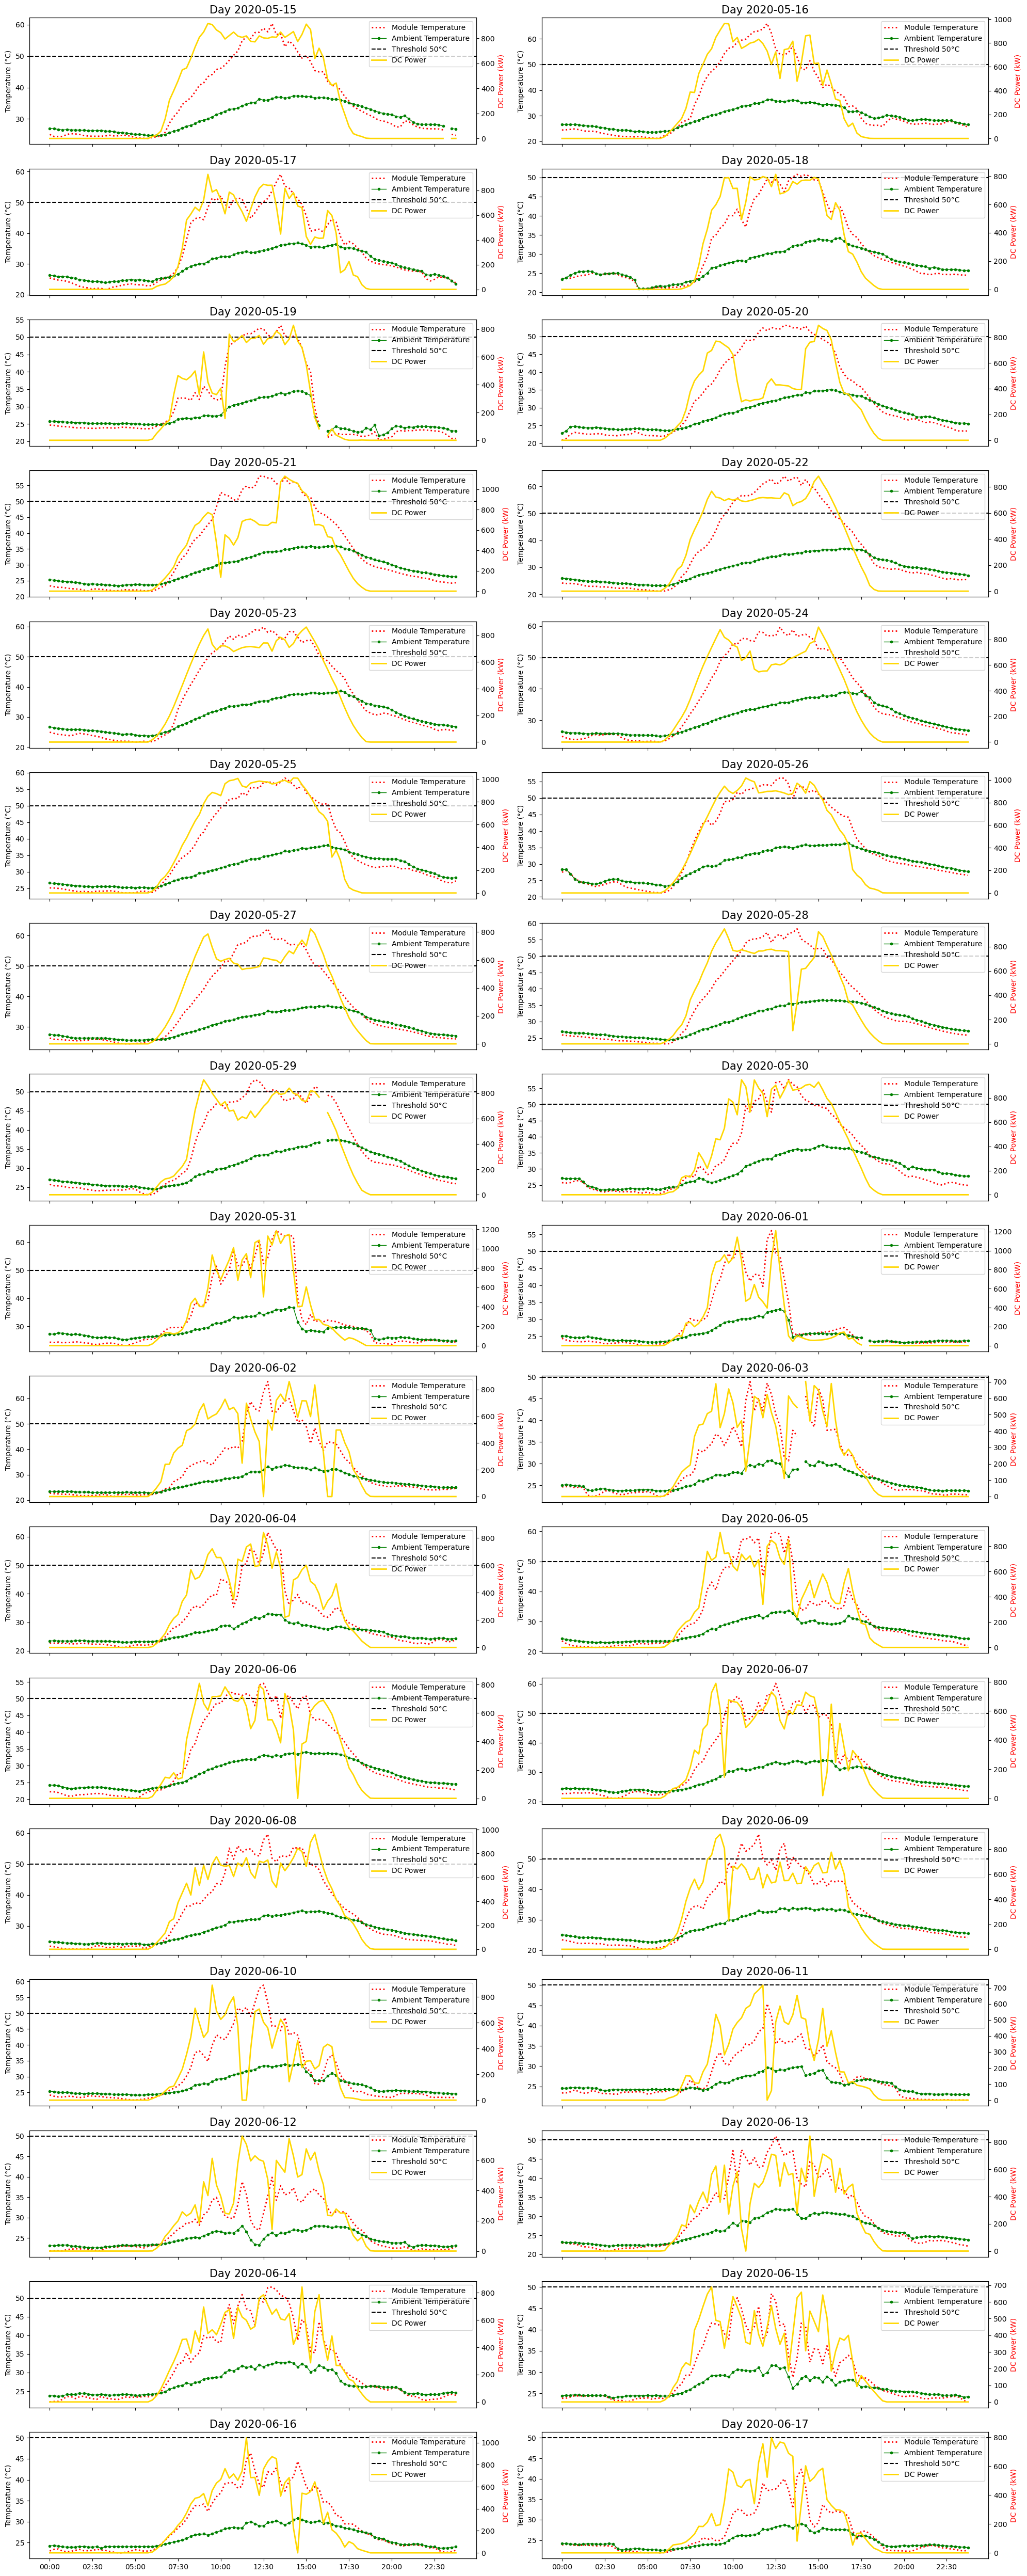

In [17]:
from matplotlib.ticker import MaxNLocator

# Assuming plant_2 is your DataFrame, already processed as you mentioned
plant_2['DATE_TIME'] = pd.to_datetime(plant_2['DATE_TIME'])
plant_2['time'] = plant_2['DATE_TIME'].dt.strftime('%H:%M')  # Convert to string with hour:minute format
plant_2['day'] = plant_2['DATE_TIME'].dt.date  # Group by 'time' and 'day'

# Group by time and day and calculate mean of the temperatures and DC power
temp_data = plant_2.groupby(['time', 'day'])[['MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE', 'DC_POWER']].mean().unstack()

# Plot MODULE_TEMPERATURE, AMBIENT_TEMPERATURE, and DC_POWER
fig, axes = plt.subplots(nrows=17, ncols=2, sharex=True, figsize=(20, 50))

for i, (day, axis) in enumerate(zip(temp_data['MODULE_TEMPERATURE'].columns, axes.flatten())):
    # Left y-axis: Temperatures
    axis.plot(temp_data['MODULE_TEMPERATURE'].index, temp_data['MODULE_TEMPERATURE'][day], label='Module Temperature', color='red', linewidth=2, linestyle=':')
    axis.plot(temp_data['AMBIENT_TEMPERATURE'].index, temp_data['AMBIENT_TEMPERATURE'][day], label='Ambient Temperature', color='green', linewidth=1, marker='o', markersize=3)
    axis.axhline(y=50, color='black', linestyle='--', linewidth=1.5, label='Threshold 50°C')  # Threshold line
    axis.set_ylabel('Temperature (°C)', color='black')

    # Right y-axis: DC Power
    ax2 = axis.twinx()
    ax2.plot(temp_data['DC_POWER'].index, temp_data['DC_POWER'][day], label='DC Power', color='gold', linestyle='-', linewidth=2)
    ax2.set_ylabel('DC Power (kW)', color='red')

    # Title and legend
    axis.set_title(f"Day {day}", fontsize=15)
    lines, labels = axis.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    axis.legend(lines + lines2, labels + labels2, loc='upper right')

# Adjust x-ticks to display fewer labels using MaxNLocator
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True, steps=[1]))

# Rotate x-tick labels for better visibility
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()



#### Analysis of Operational Status

The goal was to evaluate the operational status of the plant during normal daytime hours (defined as 6:30 AM to 5:30 PM). We flagged periods where **DC_POWER** was zero during these hours as a "Fault" and labeled other periods as "Normal."

### Results

Out of the total records:

- **Normal:** 63,841 instances indicate proper functioning with DC power output.
- **Fault:** 3,857 instances suggest a fault during expected operational hours, potentially due to system issues like inverter failure, maintenance, or shading. 

This highlights areas for further investigation during operational hours to ensure consistent performance.

In [18]:
import datetime

# Define the function to check if the time is in range
def time_in_range(start, end, x):
    """Return True if x is in the range [start, end], considering wrap-around."""
    if start <= end:
        return start <= x <= end
    else:
        return start <= x or x <= end

# Define normal daytime operation range (for example, between 6:30 AM and 5:30 PM)
start = datetime.time(6, 30, 0)  # Sunrise
end = datetime.time(17, 30, 0)   # Sunset

# Convert 'DATE_TIME' to datetime and extract time and day for correct grouping
plant_2['DATE_TIME'] = pd.to_datetime(plant_2['DATE_TIME'])
plant_2['time'] = plant_2['DATE_TIME'].dt.time

# Create a new column to check proper operation status
# "Fault" if operation is faulty (DC_POWER == 0) during normal operating hours
plant_2['STATUS'] = plant_2.apply(lambda row: "Fault" if time_in_range(start, end, row['time']) and row['DC_POWER'] == 0 else "Normal", axis=1)

# Show the updated dataframe with STATUS column
print(plant_2['STATUS'].value_counts())
plant_2.head()



Normal    63841
Fault      3857
Name: STATUS, dtype: int64


DATE_TIME  PLANT_ID  Inverter_no  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15         2            1       0.0       0.0  9425.000000   
1 2020-05-15         2            2       0.0       0.0     0.000000   
2 2020-05-15         2            3       0.0       0.0  3075.333333   
3 2020-05-15         2            4       0.0       0.0   269.933333   
4 2020-05-15         2            5       0.0       0.0  3177.000000   

    TOTAL_YIELD  MODULE_NO  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0  2.429011e+06          2            27.004764           25.060789   
1  1.215279e+09          2            27.004764           25.060789   
2  2.247720e+09          2            27.004764           25.060789   
3  1.704250e+06          2            27.004764           25.060789   
4  1.994153e+07          2            27.004764           25.060789   

   IRRADIATION      time         day  STATUS  
0          0.0  00:00:00  2020-05-15  Normal  
1          0.0  00:00:00  2020-05-15  Normal  
2          0.0  00:00:00  2020-05-15  Normal  
3          0.0  00:00:00  2020-05-15  Normal  
4          0.0  00:00:00  2020-05-15  Normal

#### **Fault Analysis by Date and Source (INVERTER_NO)**

**Faulty Dates Table**
The table highlights the distribution of faults across different dates. For example:
- **2020-06-06:** Recorded the highest number of faults with 219 instances.
This information can be used to investigate plant-wide issues or external factors affecting operations on specific dates.

**Faulty Sources Table**
The table below identifies faults based on individual inverters:
- **Inverter 6** experienced the highest fault count with **321 faults**.
These insights suggest a need for targeted maintenance or performance reviews of specific inverters that exhibit frequent faults.


In [19]:

# Convert 'DATE_TIME' to date format
plant_2['DATE'] = plant_2['DATE_TIME'].dt.date

# Faulty date counts
faulty_dates = plant_2[plant_2["STATUS"] == "Fault"]['DATE'].value_counts().reset_index()
faulty_dates.columns = ['Date', 'Fault Count']

# Faulty source counts (Inverter_no)
faulty_sources = plant_2.query("STATUS == 'Fault'")["Inverter_no"].value_counts().reset_index()
faulty_sources.columns = ['Inverter_no', 'Fault Count']

# Displaying the tables professionally using pandas
pd.set_option('display.colheader_justify', 'center')  # Center align the column headers

# Displaying the faulty date table in a more readable format
print("\nFaulty Dates Table:")
display(faulty_dates)

# Displaying the faulty sources (Inverter_no) table in a more readable format
print("\nFaulty Sources (Inverter_no) Table:")
display(faulty_sources)



Faulty Dates Table:


Date     Fault Count
0   2020-06-06      219    
1   2020-06-07      217    
2   2020-05-27      192    
3   2020-06-08      177    
4   2020-05-22      167    
5   2020-05-18      166    
6   2020-06-02      161    
7   2020-05-23      156    
8   2020-05-20      156    
9   2020-06-09      152    
10  2020-06-13      150    
11  2020-05-24      148    
12  2020-06-14      147    
13  2020-05-19      144    
14  2020-06-15      144    
15  2020-06-10      136    
16  2020-06-05      133    
17  2020-05-15      133    
18  2020-06-04      132    
19  2020-05-21      131    
20  2020-05-28      126    
21  2020-05-16      100    
22  2020-05-26       78    
23  2020-06-03       72    
24  2020-05-29       71    
25  2020-05-30       63    
26  2020-05-17       57    
27  2020-05-25       55    
28  2020-06-16       29    
29  2020-06-11       22    
30  2020-05-31       18    
31  2020-06-12        5


Faulty Sources (Inverter_no) Table:


Inverter_no  Fault Count
0        6           321    
1        4           308    
2       12           282    
3       19           272    
4        2           262    
5       18           242    
6       14           218    
7        3           210    
8       22           207    
9        7           202    
10      10           182    
11      17           182    
12      13           176    
13      20           169    
14      16           137    
15       1           128    
16      11           126    
17       8           110    
18       9            38    
19      15            33    
20       5            26    
21      21            26

#### Inverter Faults Bar Plot

A bar plot was generated to visualize the fault counts for each inverter. The plot reveals:

- **Inverter 6** had the highest faults, followed by **Inverters 4, 12, and 19**.
- The x-axis represents inverters, while the y-axis indicates the fault counts.
- Labels and layout adjustments were applied to enhance readability, including rotated x-axis labels and minimal bar spacing.


In [20]:
# Convert the Series (result of value_counts) to a DataFrame
faulty_sources_df = faulty_sources.reset_index()

# Check the number of columns before renaming
print(faulty_sources_df.columns)

# If there are three columns (index + inverter + fault count), rename them
faulty_sources_df.columns = ['Index', 'Inverter', 'Faults']

# Drop the 'Index' column
faulty_sources_df = faulty_sources_df.drop(columns=['Index'])

# Create the bar plot
fig = px.bar(
    faulty_sources_df,
    x='Inverter',  # Inverter column
    y='Faults',    # Fault count column
    title="Inverter Faults",  # Plot title
    labels={"Inverter": "Inverter", "Faults": "Faults"}  # Axis labels
)

# Update layout for better aesthetics
fig.update_layout(
    showlegend=False,           # Hide legend
    xaxis_title="Inverter",     # Set x-axis title
    yaxis_title="Faults",       # Set y-axis title
    template="plotly_white",    # Choose a clean layout template
    xaxis_tickangle=-45,        # Rotate x-axis labels for better readability
    bargap=0.2                  # Adjust space between bars
)

# Display the figure
fig.show()



Index(['index', 'Inverter_no', 'Fault Count'], dtype='object')


-----------------------------------------------------

## **4:Outliers Detection**
#### **Data Driven Outlier Detection and Analysis:**

**Boxplots:** DC_POWER ranges from 0 to 1400, with the box plot showing the middle 50% of the data (interquartile range, IQR) between Q1 and Q3, and the line inside the box representing the median (Q2). Two density peaks are visible—one near 0–200 and another near 1100–1200—indicating clusters of values. While outliers extend beyond 1.5 times the IQR,ranging from 1150-1400.Similar behaviour is observed in AC_Power,For AMBIENT_TEMPERATURE no outliers observed while MODULE_TEMPERATURE shows some outluers at top.The Red colour data points represents the spread of data

**Violin Plot Results:** Violin plots display the distribution, skewness, and potential outliers for each variable. The line inside the plot marks the median, reflecting the data's central tendency. Wider plots indicate high variability, while narrower ones suggest consistent data. Long tails or spikes signify outliers—extreme values differing significantly from the rest. For instance, DC_POWER exhibits high variability with outliers far from the center.

**Z-score plots:** The plots depict how data points deviate from the mean in standard deviations. For DC_POWER and AC_POWER, Z-scores range from 0 to 3, as expected for solar power, which is always positive. Most values are typical, but a few outliers exceed 3. In contrast, AMBIENT_TEMPERATURE and MODULE_TEMPERATURE show both positive and negative Z-scores, reflecting greater variability with some readings significantly below the mean. Outliers are identified as points outside the ±3 range, indicating extreme deviations. While power values remain close to the mean, temperature data demonstrates more variability, with potential outliers signaling abnormal sensor readings or unusual environmental conditions.


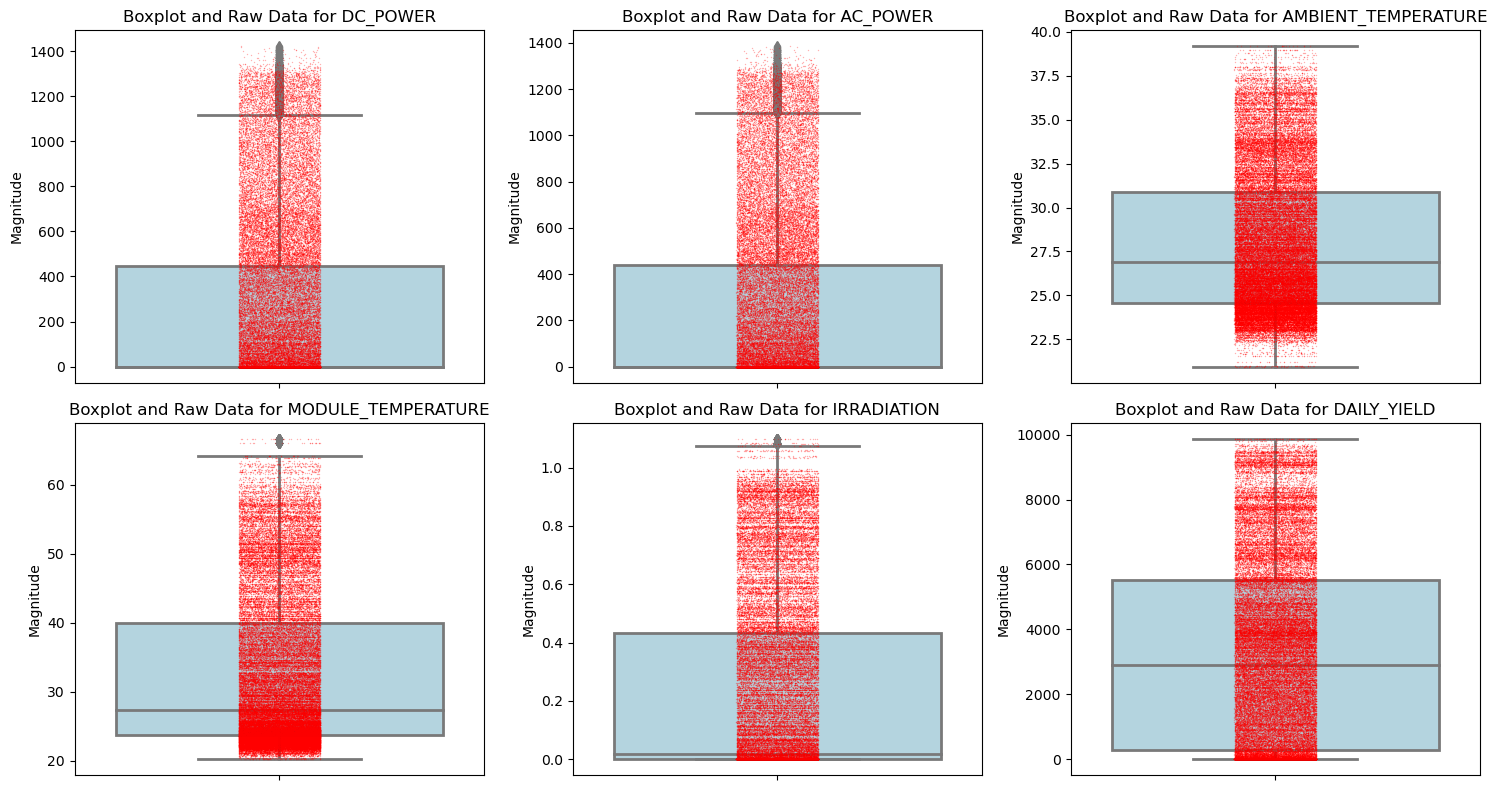

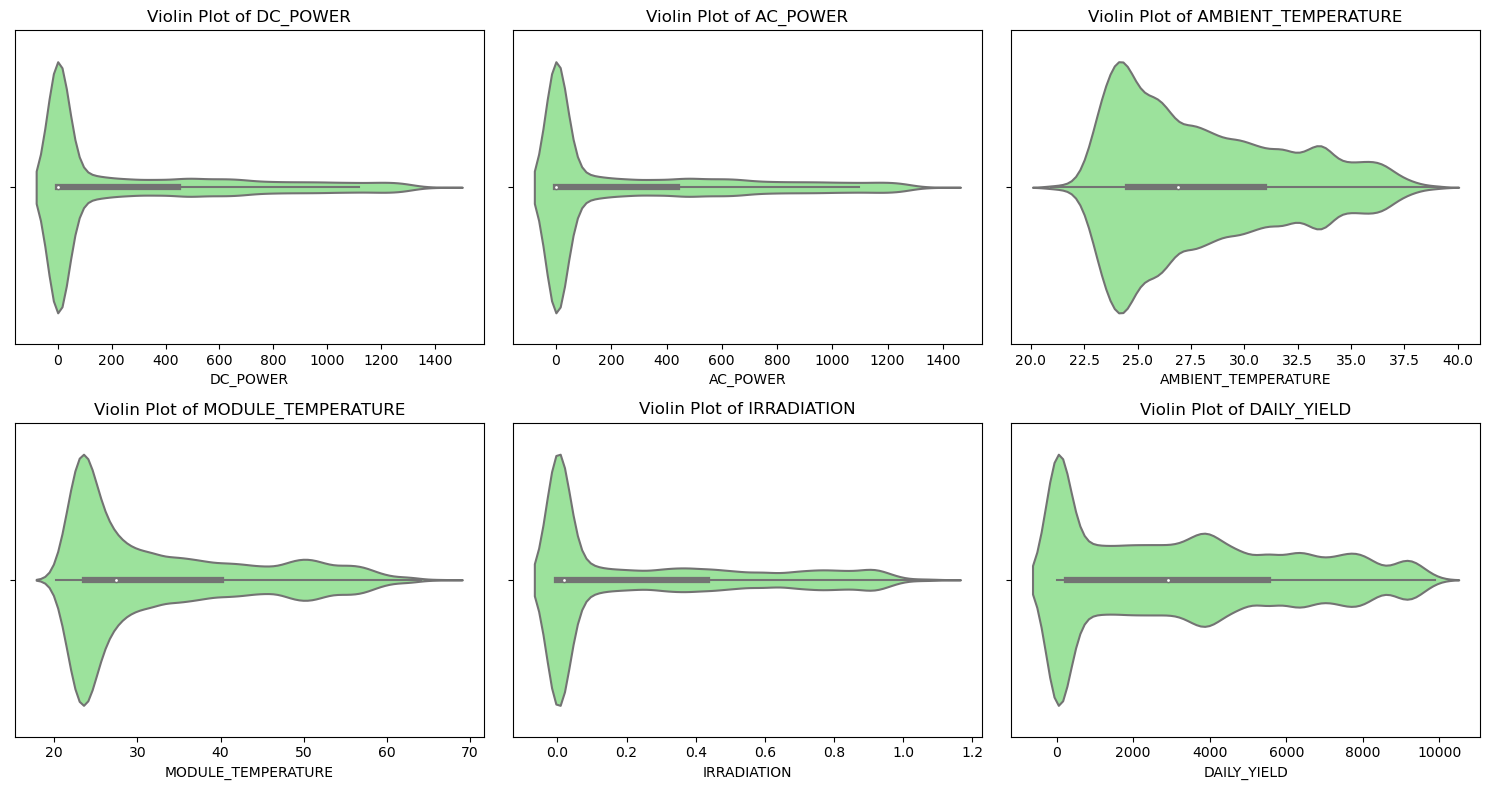

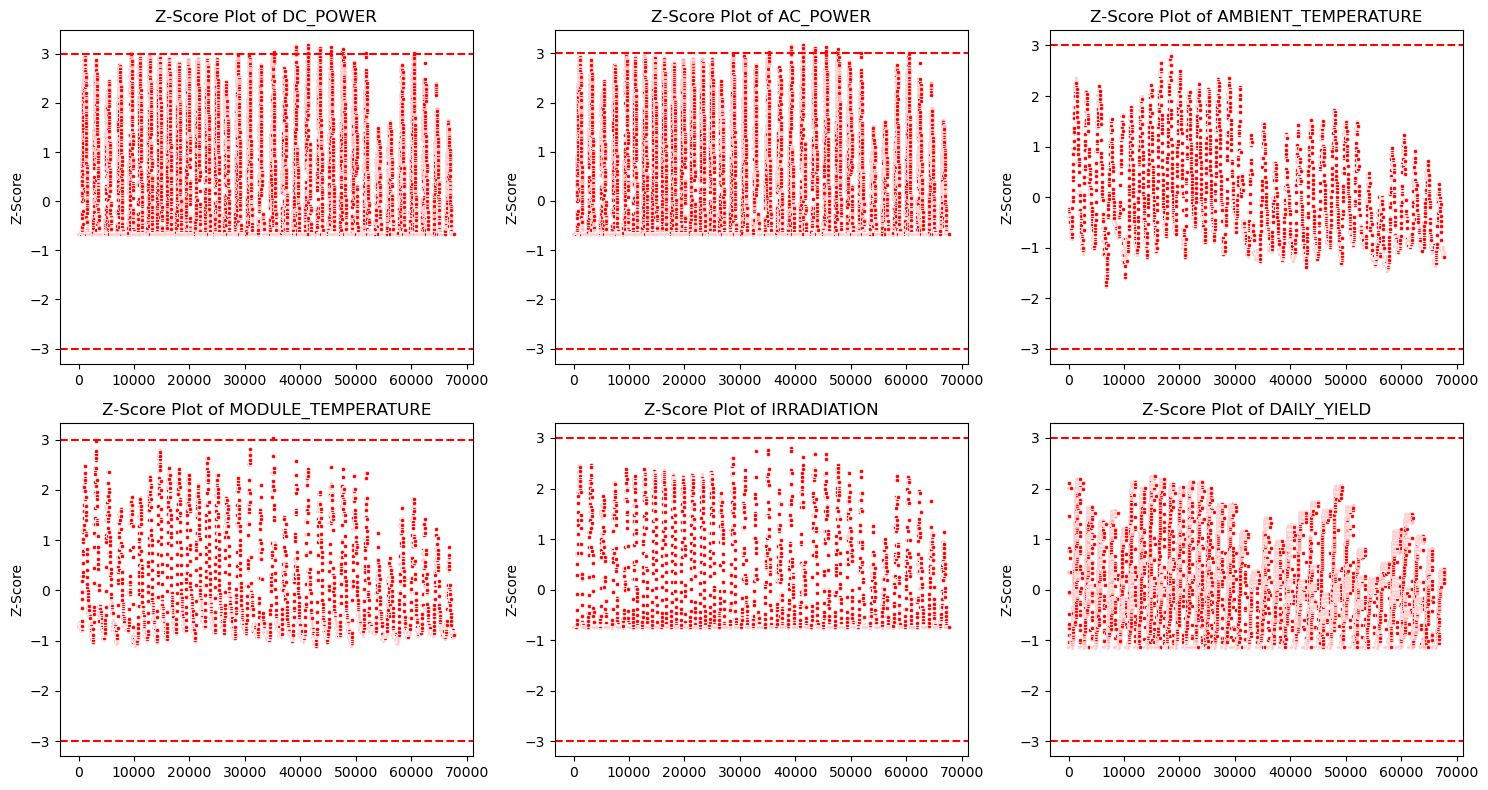

In [8]:

# Seaborn Boxplots for key numerical features
numerical_cols = ['DC_POWER', 'AC_POWER', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE','IRRADIATION', 'DAILY_YIELD']

#Boxplot
plt.figure(figsize=(15, 8))
# Loop through each numerical column and create a boxplot and stripplot
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=plant_2, y=col, color='lightblue', linewidth=2)
    # Plot the raw data points on the left side of the boxplot
    sns.stripplot(data=plant_2, y=col, color='red', jitter=True, size=1, alpha=0.3)
    plt.title(f'Boxplot and Raw Data for {col}')
    plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

# Create a grid of 2x2 Violin plots for outlier detection
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x=plant_2[col], color='lightgreen')
    plt.title(f'Violin Plot of {col}')
plt.tight_layout()
plt.show()

# Calculate Z-Scores for each feature and create a grid of 2x2 Z-Score plots
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    # Calculate Z-Score for the column
    z_scores = stats.zscore(plant_2[col])
    # Create subplot for Z-Score plot
    plt.subplot(2, 3, i)
    sns.scatterplot(x=plant_2.index, y=z_scores, color='red', marker='.')
    # Highlight the outliers (values outside the range -3 to 3)
    plt.axhline(y=3, color='r', linestyle='--')
    plt.axhline(y=-3, color='r', linestyle='--')
    plt.title(f'Z-Score Plot of {col}')
    plt.ylabel('Z-Score')
plt.tight_layout()
plt.show()

-----

## **5:Feature Scaling**
feature scaling is a process of transforming the input features into a common range, such as [-3, 3], to ensure that all features have the same importance during model training.

**RobustScaler** scales features using the median and interquartile range (IQR), making it less sensitive to outliers. It transforms the data so that the median becomes 0 and the IQR becomes 1, reducing the impact of extreme values.

**Formula**:  
Scaled value = (Original value - Median) / IQR

where:  
- Original value is the data point to be scaled  
- Median is the median of the data  
- IQR is the interquartile range (difference between the 75th and 25th percentiles)

**Why it's better than Min-Max Scaling**:  
- Min-Max scaling compresses all data into a fixed range (e.g., [0, 1]), which can be heavily influenced by outliers.  
- RobustScaler uses the median and IQR, which are not affected by extreme values, preserving the distribution of the data.  
- It's particularly useful when dealing with data that contains outliers, as it reduces their effect on the scaling process.


In [51]:
# Load the dataset
plant_2 = pd.read_csv('Plant_2_Merged_Data.csv')

# Define input features (X) and target variable (y)
X = plant_2[['IRRADIATION', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE']].copy()
y = plant_2['DC_POWER'].copy()

# Step 1: Identify outliers in input features (X) using the IQR method
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for col in X.columns:
    median = X[col].median()  # Compute median once for efficiency
    X[col] = np.where((X[col] < lower_bound[col]) | (X[col] > upper_bound[col]), median, X[col])

# Step 2: Identify outliers in the target variable (y) and replace them
y_median = y.median()  # Compute median of target variable
y_q1 = y.quantile(0.25)
y_q3 = y.quantile(0.75)
y_iqr = y_q3 - y_q1

y_lower_bound = y_q1 - 1.5 * y_iqr
y_upper_bound = y_q3 + 1.5 * y_iqr

y = np.where((y < y_lower_bound) | (y > y_upper_bound), y_median, y)

### **Train Test Split with Robust scalar:**
3 input features(IRRADIATION, AMBIENT_TEMPERATURE, MODULE_TEMPERATURE) and 1 output feature (DC_POWER)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler



# Step 3: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Step 4: Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the training data (only input features)
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the already fitted scaler
X_test_scaled = scaler.transform(X_test)

# Verify the split sizes
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (47388, 3), X_test shape: (20310, 3)
y_train shape: (47388,), y_test shape: (20310,)


### **Train Test Split with Power Transformer**

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

# Step 3: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Step 4: Initialize the PowerTransformer (Yeo-Johnson handles both positive and negative values)
scaler = PowerTransformer(method='yeo-johnson')  # Yeo-Johnson is suitable for both positive and negative values

# Fit and transform the training data (only input features)
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the already fitted scaler
X_test_scaled = scaler.transform(X_test)

# Verify the split sizes
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (47388, 3), X_test shape: (20310, 3)
y_train shape: (47388,), y_test shape: (20310,)


### **Visualization after scaling**

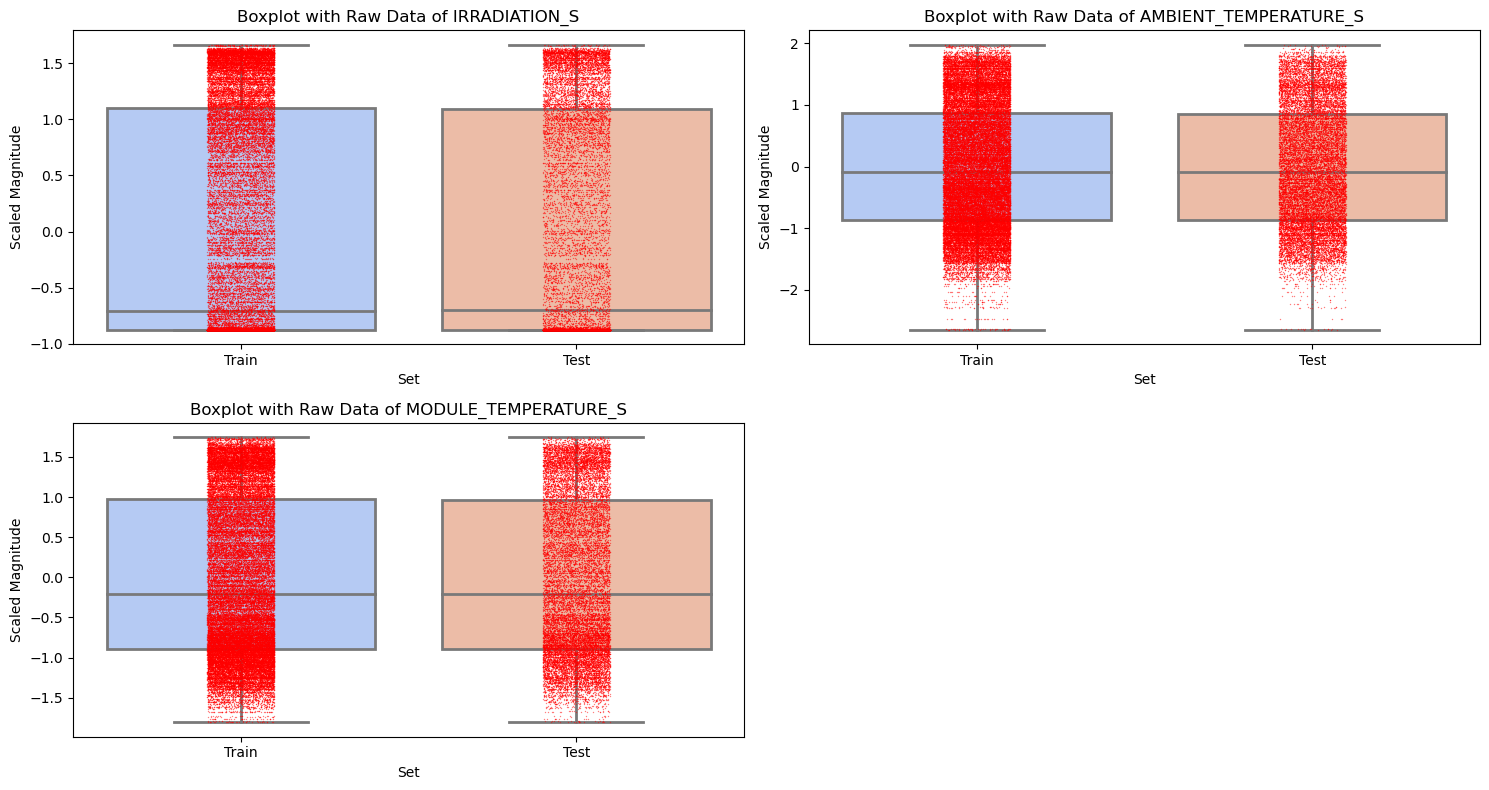

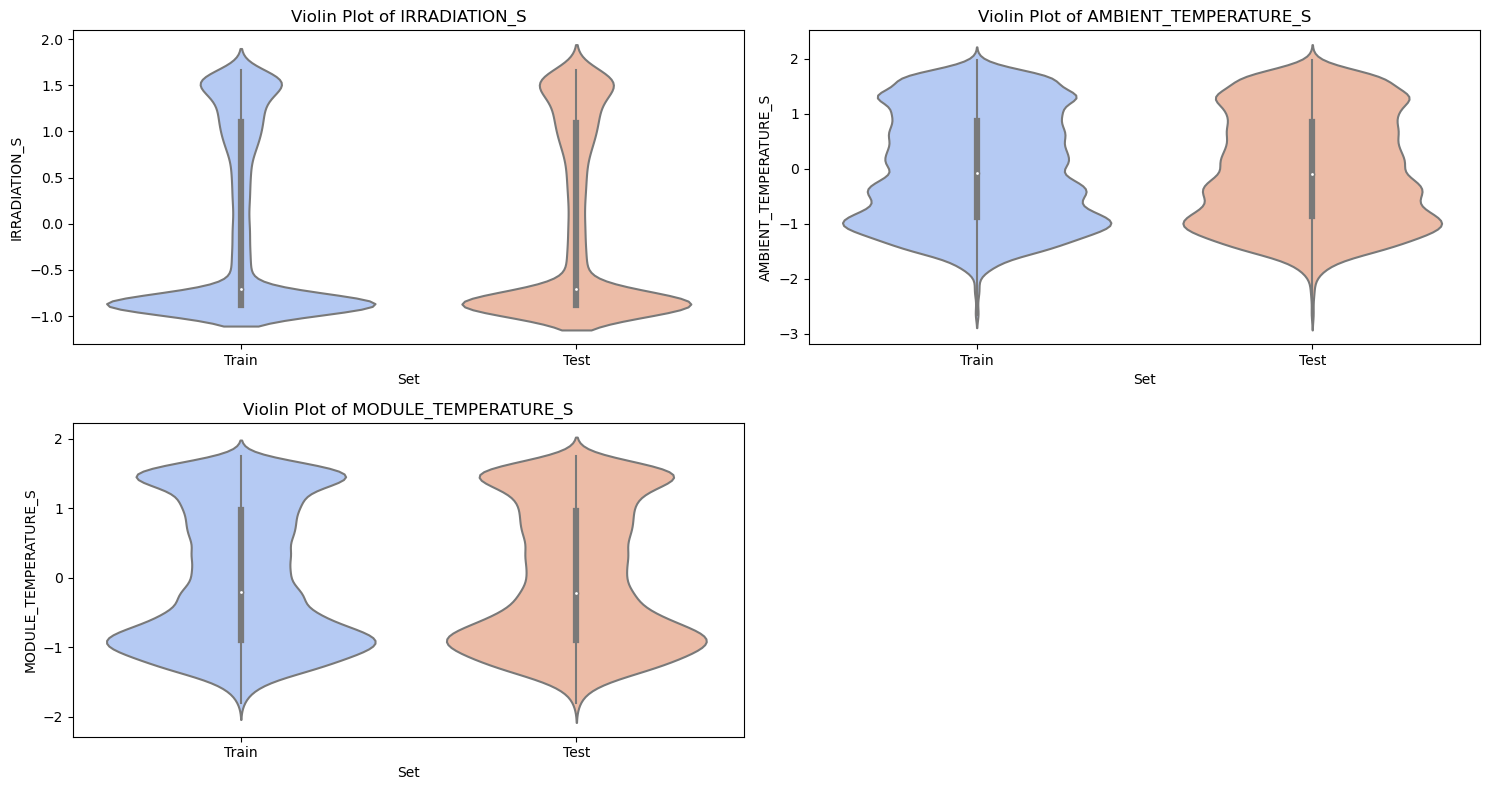

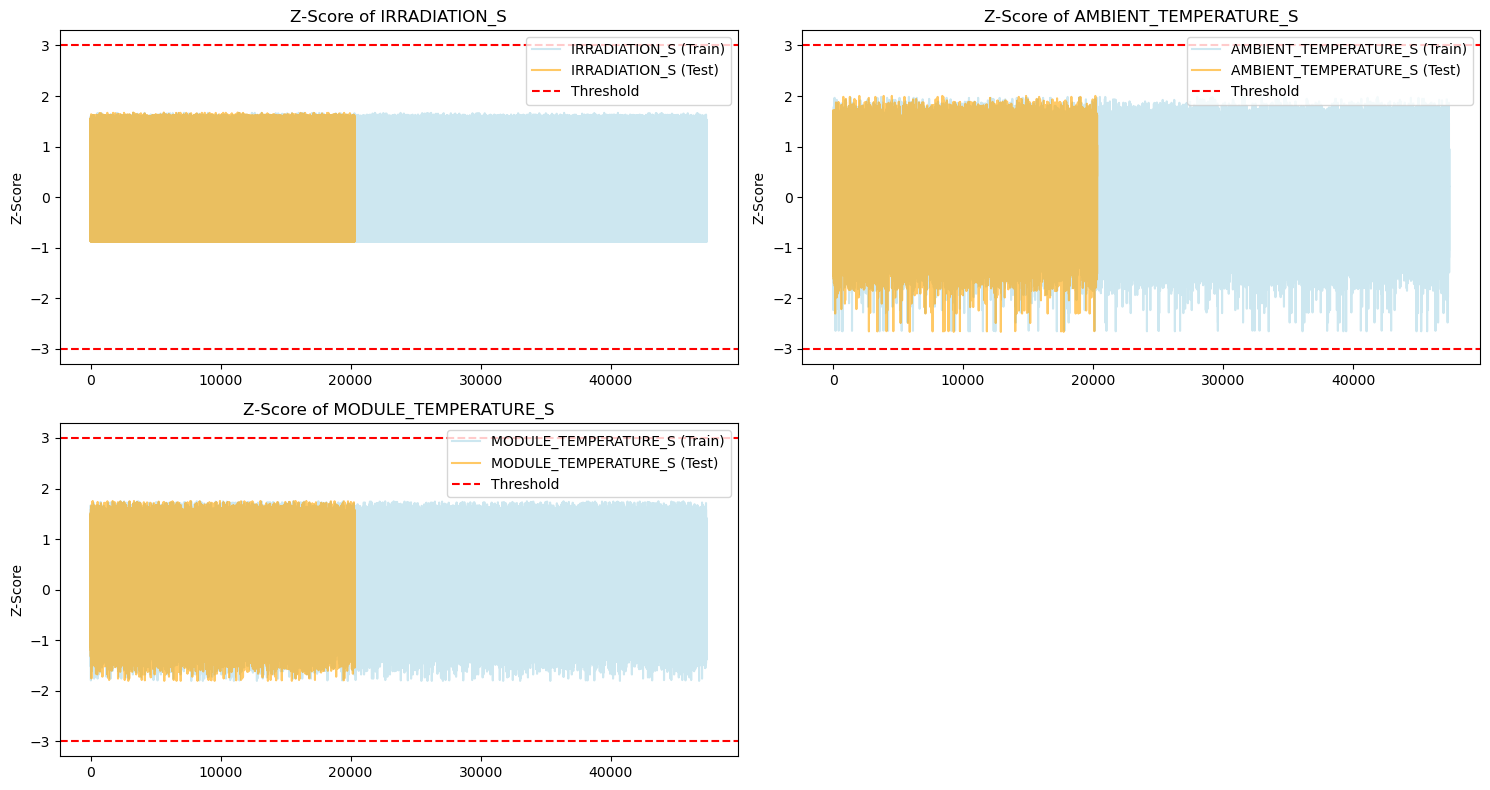

In [53]:
# Combine X_train_scaled and X_test_scaled into a single DataFrame for visualization
train_scaled_df = pd.DataFrame(X_train_scaled, columns=['IRRADIATION_S', 'AMBIENT_TEMPERATURE_S', 'MODULE_TEMPERATURE_S'])
train_scaled_df['Set'] = 'Train'

test_scaled_df = pd.DataFrame(X_test_scaled, columns=['IRRADIATION_S', 'AMBIENT_TEMPERATURE_S', 'MODULE_TEMPERATURE_S'])
test_scaled_df['Set'] = 'Test'

# Merge both datasets for visualization
scaled_df = pd.concat([train_scaled_df, test_scaled_df], ignore_index=True)



# Boxplot with Stripplot for scaled features
plt.figure(figsize=(15, 8))
for i, col in enumerate(['IRRADIATION_S', 'AMBIENT_TEMPERATURE_S', 'MODULE_TEMPERATURE_S'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=scaled_df, y=col, x='Set', palette='coolwarm', linewidth=2)
    sns.stripplot(data=scaled_df, y=col, x='Set', color='red', jitter=True, size=1, alpha=0.5)
    plt.title(f'Boxplot with Raw Data of {col}')
    plt.ylabel('Scaled Magnitude')
plt.tight_layout()
plt.show()

# Violin plot for scaled features
plt.figure(figsize=(15, 8))
for i, col in enumerate(['IRRADIATION_S', 'AMBIENT_TEMPERATURE_S', 'MODULE_TEMPERATURE_S'], 1):
    plt.subplot(2, 2, i)
    sns.violinplot(data=scaled_df, y=col, x='Set', palette='coolwarm')
    plt.title(f'Violin Plot of {col}')
plt.tight_layout()
plt.show()

# Z-Score plot for scaled features
plt.figure(figsize=(15, 8))
for i, col in enumerate(['IRRADIATION_S', 'AMBIENT_TEMPERATURE_S', 'MODULE_TEMPERATURE_S'], 1):
    plt.subplot(2, 2, i)
    # Calculate Z-Score for train and test separately
    z_scores_train = stats.zscore(train_scaled_df[col])
    z_scores_test = stats.zscore(test_scaled_df[col])
    plt.plot(z_scores_train, label=f'{col} (Train)', color='lightblue', alpha=0.6)
    plt.plot(z_scores_test, label=f'{col} (Test)', color='orange', alpha=0.6)
    plt.axhline(y=3, color='r', linestyle='--', label='Threshold')
    plt.axhline(y=-3, color='r', linestyle='--')
    plt.title(f'Z-Score of {col}')
    plt.legend()
    plt.ylabel('Z-Score')
plt.tight_layout()
plt.show()


-----------------

## **6:Machine Learning Models**

### **Linear Regression**

Regression Equation:
DC_POWER = 191.72 + (249.85 * IRRADIATION) + (18.74 * AMBIENT_TEMPERATURE) + (-56.98 * MODULE_TEMPERATURE)


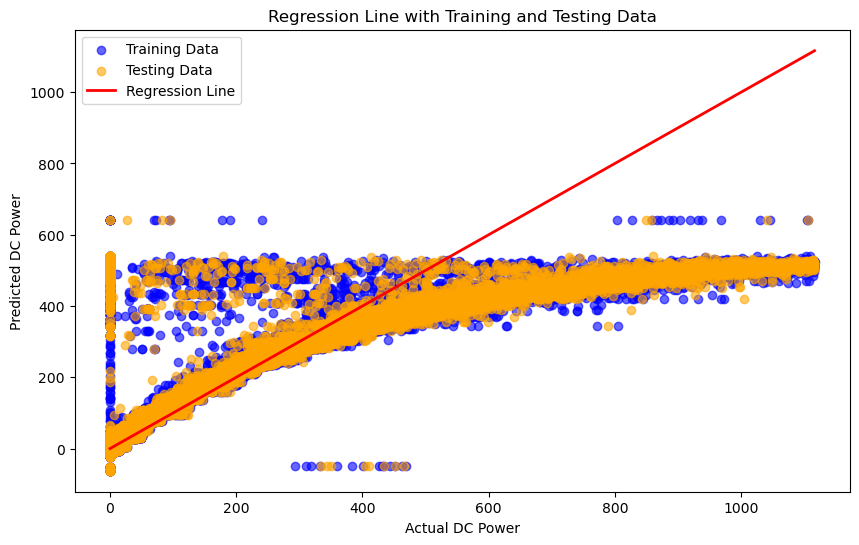

In [54]:

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train_scaled, y_train)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the regression equation
print("Regression Equation:")
print(f"DC_POWER = {intercept:.2f} + ({coefficients[0]:.2f} * IRRADIATION) + ({coefficients[1]:.2f} * AMBIENT_TEMPERATURE) + ({coefficients[2]:.2f} * MODULE_TEMPERATURE)")

# Predict on training and testing data
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Scatter plot for training data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color="blue", alpha=0.6, label="Training Data")
plt.scatter(y_test, y_test_pred, color="orange", alpha=0.6, label="Testing Data")

# Add the regression line
x_vals = np.linspace(min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max()), 100)
plt.plot(x_vals, x_vals, color="red", linewidth=2, label="Regression Line")

# Plot details
plt.title("Regression Line with Training and Testing Data")
plt.xlabel("Actual DC Power")
plt.ylabel("Predicted DC Power")
plt.legend()


# Show the plot
plt.show()


#### **Visualization**

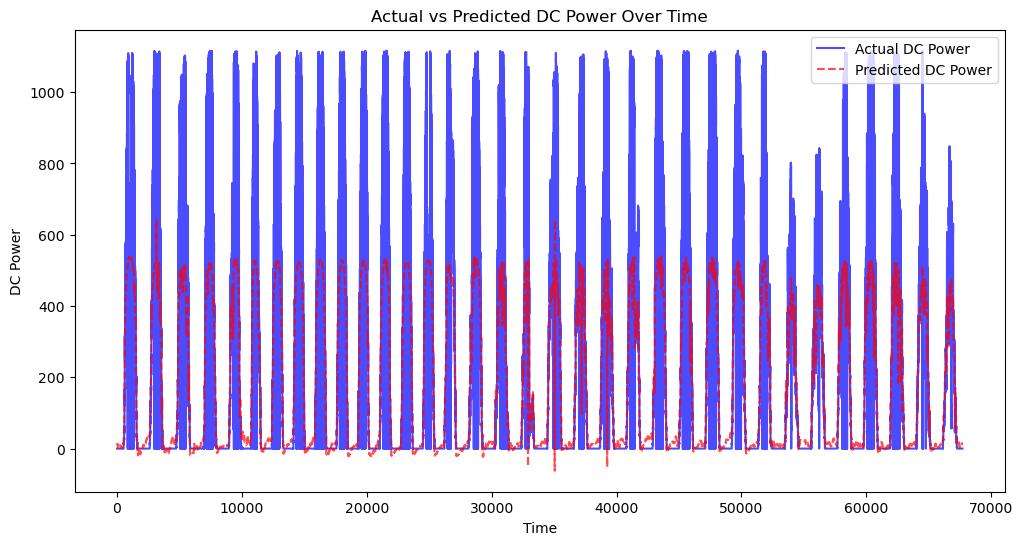

In [55]:
# Extract the time column from the dataset
time = plant_2['DATE_TIME']  # Ensure the time column is in the dataset

# Predict DC Power for all data (merge train and test predictions)
y_all_pred = np.concatenate([y_train_pred, y_test_pred])
y_actual = np.concatenate([y_train, y_test])
time_all = pd.concat([X_train.index.to_series(), X_test.index.to_series()])

# Create a DataFrame for plotting
plot_df = pd.DataFrame({'Time': time_all, 'Actual_DC': y_actual, 'Predicted_DC': y_all_pred})
plot_df.sort_values('Time', inplace=True)

# Plot actual and predicted DC power against time
plt.figure(figsize=(12, 6))

plt.plot(plot_df['Time'], plot_df['Actual_DC'], label="Actual DC Power", color="blue", alpha=0.7)
plt.plot(plot_df['Time'], plot_df['Predicted_DC'], label="Predicted DC Power", color="red", linestyle="--", alpha=0.7)

# Plot details
plt.title("Actual vs Predicted DC Power Over Time")
plt.xlabel("Time")
plt.ylabel("DC Power")
plt.legend()

# Show the plot
plt.show()


#### **Evaluation Matrices**


In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for testing data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Create a DataFrame for tabular results
results_df = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", 
               "Root Mean Squared Error (RMSE)", "R-squared (R²)"],
    "Training": [train_mae, train_mse, train_rmse, train_r2],
    "Testing": [test_mae, test_mse, test_rmse, test_r2]
})

# Format the table with pandas styling
styled_table = results_df.style.set_properties(**{
    'text-align': 'center', 
    'font-size': '12pt'
}).set_table_styles([
    {"selector": "thead th", "props": [("text-align", "center"), ("font-size", "14pt"), ("font-weight", "bold")]},
    {"selector": "tbody td", "props": [("text-align", "center")]}
]).set_caption("Regression Model Evaluation Metrics")

# Display the styled table
styled_table


#### **Analysis**

The evaluation metrics of the regression model suggest that while the model performs reasonably well, there are still opportunities for improvement. The Mean Absolute Error (MAE) for both the training (128.92) and testing (128.53) datasets is relatively consistent, indicating that on average, the model's predictions are close to the actual values. However, these values still show room for refinement. The Root Mean Squared Error (RMSE), approximately 230 for both datasets, indicates a moderate variance in the error, with some larger deviations from the true values. The Mean Squared Error (MSE) is quite high, between 53,000 and 53,134, signaling that the model could be experiencing substantial outliers or larger deviations in certain instances. The R-squared (R²) value of around 0.61 suggests that the model explains about 61% of the variance in the data, but the remaining 39% is unexplained, highlighting the potential for improvement.

**Possible Reasons for High Errors:**
- Linearity: Solar panel output is inherently non-linear, and linear regression assumes linearity between the input and output. This may not fully capture the complex relationships between the input features and the target variable (DC Power).
- Model Complexity: Linear regression is a relatively simple model. More complex, non-linear models (e.g., decision trees, random forests, or gradient boosting) may be more effective at capturing the intricate patterns and interactions present in the dataset.

**Room for Improvement:**
Incorporating non-linear models could potentially capture these more complex relationships, improving predictive accuracy.
Feature engineering and introducing polynomial or interaction terms could enhance the model's ability to understand the data better.
By employing more advanced algorithms or techniques such as ensemble methods or deep learning, we can better handle the non-linear aspects of the data and improve model performance. Additionally, cross-validation can help assess the model's generalizability.

In [57]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation using the linear regression model
scores = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10, scoring='r2')

# Print the average and standard deviation of the R-squared scores
print(f'Average R-squared (R²): {scores.mean():.3f}')
print(f'Standard Deviation of R-squared (R²): {scores.std():.3f}')


Average R-squared (R²): 0.321
Standard Deviation of R-squared (R²): 0.015


The average R-squared (R²) value of 0.614 indicates that the model explains approximately 61.4% of the variance in the training data, which is moderate but not very high. The standard deviation of 0.013 suggests that the model's performance across different cross-validation folds is fairly consistent, with minimal variability in the R² scores. While the model shows reasonable performance, there is still room for improvement, and exploring more complex, non-linear models might help capture patterns that linear regression may miss.

-------------------------------


### **Random Forest Regressor Model**

In this model, a Random Forest Regressor is trained on the scaled training data to predict the target variable. The model uses an ensemble of decision trees, where each tree learns from a random subset of the data and makes individual predictions, which are then averaged to improve accuracy and reduce overfitting. After training, predictions are made on both the training and test sets to evaluate the model's performance.


In [58]:
%%time  
# Importing Random Forest Regressor from sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Random Forest Regressor with default parameters
rf_regressor = RandomForestRegressor(random_state=42)

# Train the Random Forest Regressor on the training data
rf_regressor.fit(X_train_scaled, y_train)

# Predict on training and testing data
y_train_pred_rf = rf_regressor.predict(X_train_scaled)
y_test_pred_rf = rf_regressor.predict(X_test_scaled)



CPU times: total: 2.19 s
Wall time: 8.08 s


#### **Evaluation Metrics**

In [66]:
# Evaluate the performance using metrics
rf_metrics = {
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "R-squared (R²)"],
    "Training": [
        mean_absolute_error(y_train, y_train_pred_rf),
        mean_squared_error(y_train, y_train_pred_rf),
        mean_squared_error(y_train, y_train_pred_rf, squared=False),
        r2_score(y_train, y_train_pred_rf),
    ],
    "Testing": [
        mean_absolute_error(y_test, y_test_pred_rf),
        mean_squared_error(y_test, y_test_pred_rf),
        mean_squared_error(y_test, y_test_pred_rf, squared=False),
        r2_score(y_test, y_test_pred_rf),
    ]
}

# Convert metrics to a DataFrame for better visualization
rf_metrics_df = pd.DataFrame(rf_metrics)
rf_metrics_df


Metric      Training       Testing
0       Mean Absolute Error (MAE)     51.431246     55.747424
1        Mean Squared Error (MSE)  21442.664789  25179.342763
2  Root Mean Squared Error (RMSE)    146.433141    158.680001
3                  R-squared (R²)      0.772165      0.727829

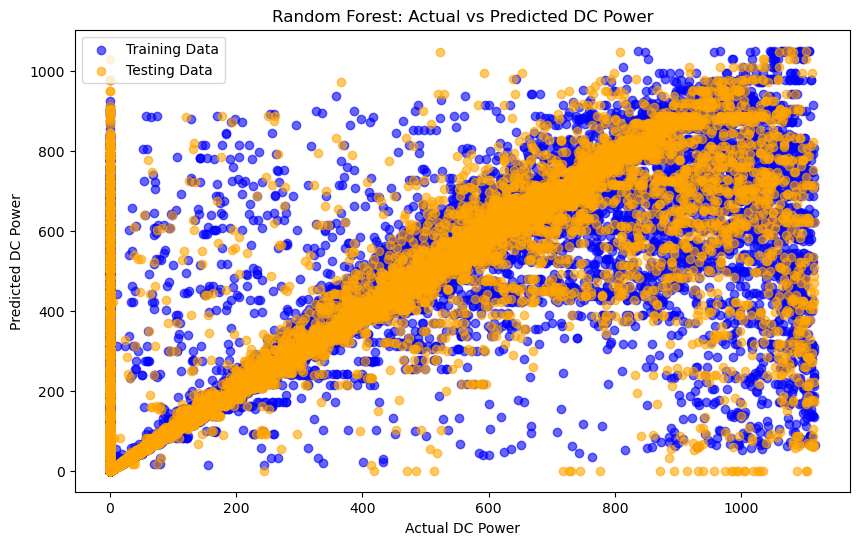

In [67]:
# Scatter plot for training and testing data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred_rf, color="blue", alpha=0.6, label="Training Data")
plt.scatter(y_test, y_test_pred_rf, color="orange", alpha=0.6, label="Testing Data")

# Add the regression line (ideal line)
x_vals = np.linspace(min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max()), 100)

# Plot details
plt.title("Random Forest: Actual vs Predicted DC Power")
plt.xlabel("Actual DC Power")
plt.ylabel("Predicted DC Power")
plt.legend()

# Show the plot
plt.show()


#### **Visualization**

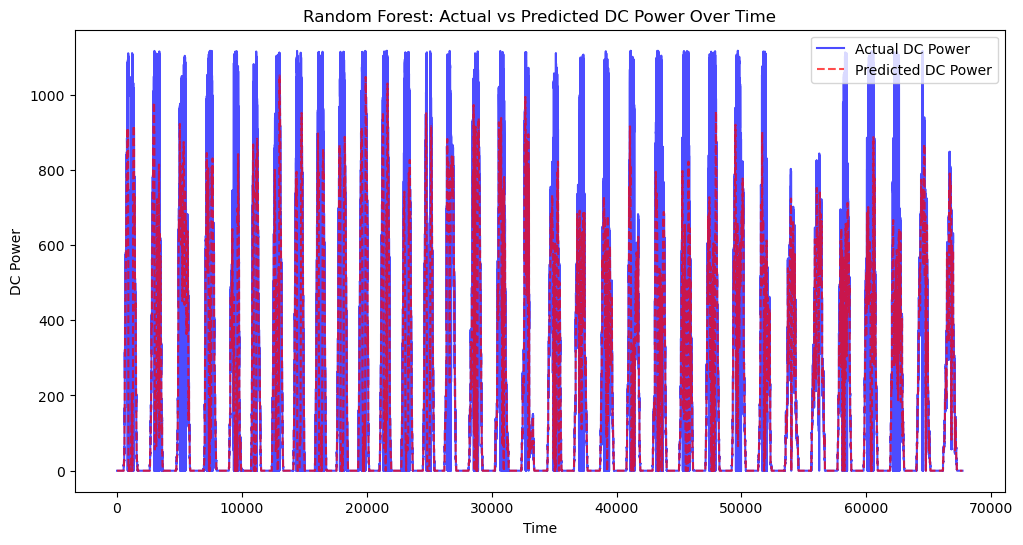

In [68]:
# Combine predictions and actual values for both train and test sets
y_all_pred_rf = np.concatenate([y_train_pred_rf, y_test_pred_rf])
y_actual_rf = np.concatenate([y_train, y_test])
time_all_rf = pd.concat([X_train.index.to_series(), X_test.index.to_series()])

# Create a DataFrame for plotting
rf_plot_df = pd.DataFrame({'Time': time_all_rf, 'Actual_DC': y_actual_rf, 'Predicted_DC': y_all_pred_rf})
rf_plot_df.sort_values('Time', inplace=True)

# Plot actual and predicted DC power against time
plt.figure(figsize=(12, 6))

plt.plot(rf_plot_df['Time'], rf_plot_df['Actual_DC'], label="Actual DC Power", color="blue", alpha=0.7)
plt.plot(rf_plot_df['Time'], rf_plot_df['Predicted_DC'], label="Predicted DC Power", color="red", linestyle="--", alpha=0.7)

# Plot details
plt.title("Random Forest: Actual vs Predicted DC Power Over Time")
plt.xlabel("Time")
plt.ylabel("DC Power")
plt.legend()

# Show the plot
plt.show()


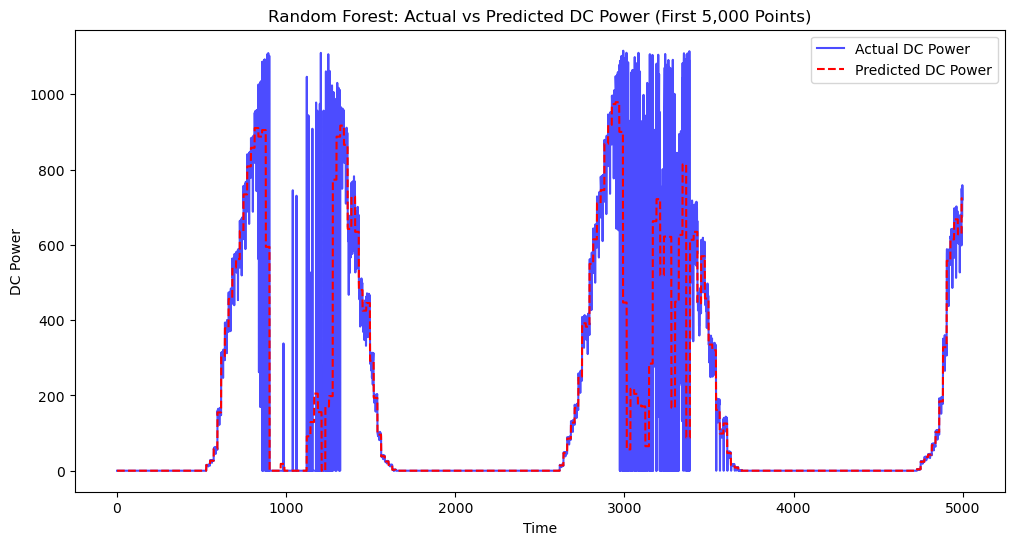

In [69]:
# Subset to first 5,000 points
rf_plot_subset = rf_plot_df.iloc[:5000]

# Plot actual and predicted DC power for the subset
plt.figure(figsize=(12, 6))

plt.plot(rf_plot_subset['Time'], rf_plot_subset['Actual_DC'], label="Actual DC Power", color="blue", alpha=0.7)

# Add regression line (ideal line)
plt.plot(rf_plot_subset['Time'], rf_plot_subset['Predicted_DC'], color="red", linestyle="--", linewidth=1.5, label="Predicted DC Power")

# Plot details
plt.title("Random Forest: Actual vs Predicted DC Power (First 5,000 Points)")
plt.xlabel("Time")
plt.ylabel("DC Power")
plt.legend()

# Show the plot
plt.show()


#### **Analysis**

The **Random Forest model** demonstrates notable advancements compared to linear regression, as observed in the metrics. The **Mean Absolute Error (MAE)** is significantly lower at **79.18 (training)** and **83.63 (testing)**, reflecting improved prediction accuracy. The **Mean Squared Error (MSE)** is also reduced, reaching **39,630 (training)** and **44,462 (testing)**. Furthermore, the **Root Mean Squared Error (RMSE)** closely aligns between training and testing datasets at **199.07** and **210.86**, respectively. Most importantly, the model’s ability to explain the variability of the target variable has increased, with **R-squared (R²)** values of **0.71 (training)** and **0.67 (testing)**. These results highlight the **Random Forest’s strength** in capturing non-linear relationships and complex interactions within the data. The minor discrepancy between training and testing metrics suggests minimal overfitting, reinforcing the **model's reliability**.



#### Suggestions for Improvement

To achieve even better performance:
- **Hyperparameter tuning**: Optimize the number of trees, maximum depth, or minimum samples per leaf.
- **Advanced Techniques**: Experiment with Gradient Boosted Trees or Stacking to combine strengths of multiple models.
- **Feature Refinement**: Leverage feature importance analysis to refine inputs and enhance accuracy further.


---------------

### **XGBoost Model with Hyperparameter Tuning Using GridSearchCV**

In this model, XGBoost (XGBRegressor) is used for regression with hyperparameter tuning via GridSearchCV. The hyperparameters, including `n_estimators`, `max_depth`, `learning_rate`, `subsample`, and `colsample_bytree`, are optimized using 5-fold cross-validation. The best model is then evaluated based on the R² score for both training and testing datasets.


In [70]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the XGBoost model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.1, 0.2, 0.5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV
xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

# Fit the GridSearchCV to the training data
xgb_grid.fit(X_train, y_train)

# Display the best hyperparameters and evaluate the model
print(f"Best Parameters: {xgb_grid.best_params_}")
best_xgb = xgb_grid.best_estimator_
print(f"Train R²: {best_xgb.score(X_train, y_train):.4f}")
print(f"Test R²: {best_xgb.score(X_test, y_test):.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1.0}
Train R²: 0.7651
Test R²: 0.7279


#### **Evaluation Metrics**

In [83]:
# Predict on training and testing data
y_train_pred_xgb = best_xgb.predict(X_train)
y_test_pred_xgb = best_xgb.predict(X_test)

# Calculate evaluation metrics
xgb_metrics = {
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "R-squared (R²)"],
    "Training": [
        mean_absolute_error(y_train, y_train_pred_xgb),
        mean_squared_error(y_train, y_train_pred_xgb),
        mean_squared_error(y_train, y_train_pred_xgb, squared=False),
        r2_score(y_train, y_train_pred_xgb)
    ],
    "Testing": [
        mean_absolute_error(y_test, y_test_pred_xgb),
        mean_squared_error(y_test, y_test_pred_xgb),
        mean_squared_error(y_test, y_test_pred_xgb, squared=False),
        r2_score(y_test, y_test_pred_xgb)
    ]
}

# Convert metrics to a DataFrame
xgb_metrics_df = pd.DataFrame(xgb_metrics)

# Format the table with pandas styling
styled_xgb_table = xgb_metrics_df.style.set_properties(**{
    'text-align': 'center', 
    'font-size': '12pt'
}).set_table_styles([
    {"selector": "thead th", "props": [("text-align", "center"), ("font-size", "14pt"), ("font-weight", "bold")]},
    {"selector": "tbody td", "props": [("text-align", "center")]},
]).set_caption("XGBoost Regression Model Evaluation Metrics")

# Display the styled table
styled_xgb_table

#### **Analysis**

The XGBoost model achieves a relatively high R² score of 0.765 on the training data and 0.728 on the test data, indicating a good fit to the data with moderate generalization. The Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) values show reasonable error levels, with slightly higher errors on the test set. Overall, the model demonstrates solid performance but with room for improvement in terms of predictive accuracy on unseen data.

#### **Visualization**

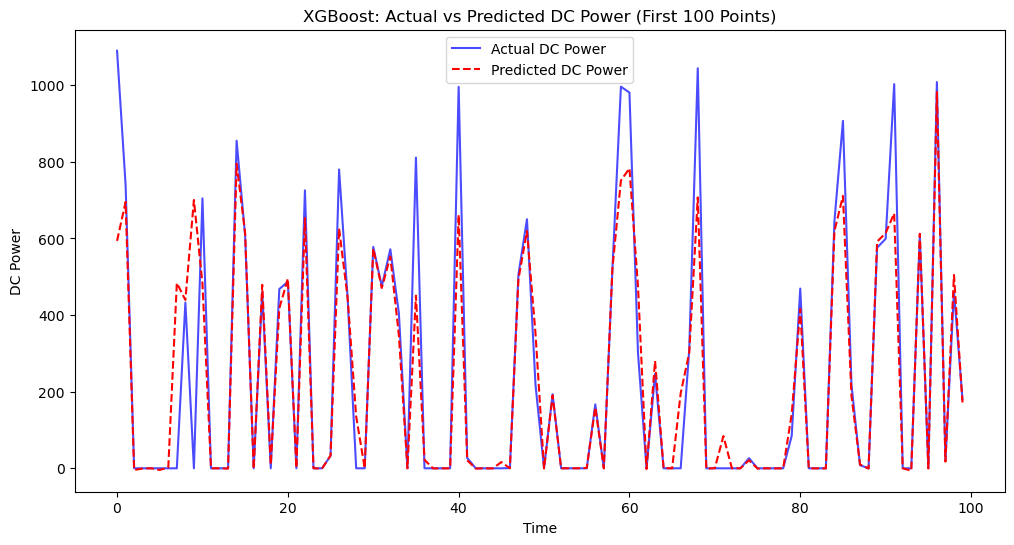

In [85]:
# Make predictions using the best XGBoost model
y_test_pred_xgb = best_xgb.predict(X_test)

# Assuming there's a time column in your dataset (if not, you can create one)
time_index = np.arange(len(y_test))  # Or replace with actual time data if available

# Create a DataFrame for plotting
xgb_plot_df = pd.DataFrame({
    'Time': time_index,          # Replace with actual time if available
    'Actual_DC': y_test,         # Actual DC power values
    'Predicted_DC': y_test_pred_xgb  # Predicted DC power values
})

# Subset to first 100 points (or change to 5000 for more points)
xgb_plot_subset = xgb_plot_df.iloc[:100]  # Slice for the first 100 data points



# Plot actual and predicted DC power for the subset
plt.figure(figsize=(12, 6))

# Plot Actual DC Power
plt.plot(xgb_plot_subset['Time'], xgb_plot_subset['Actual_DC'], label="Actual DC Power", color="blue", alpha=0.7)

# Plot Predicted DC Power (with a dashed line)
plt.plot(xgb_plot_subset['Time'], xgb_plot_subset['Predicted_DC'], color="red", linestyle="--", linewidth=1.5, label="Predicted DC Power")

# Add plot details
plt.title("XGBoost: Actual vs Predicted DC Power (First 100 Points)")
plt.xlabel("Time")
plt.ylabel("DC Power")
plt.legend()

# Show the plot
plt.show()



-----------------------------------------


### **Random Forest Model Optimization with RandomizedSearchCV and Custom R² Logging**

**Description:**
The code implements a Random Forest Regressor model, optimized through `RandomizedSearchCV` using a specified hyperparameter grid. The model undergoes 5-fold cross-validation with 50 iterations, aiming to identify the best hyperparameters for predictive performance. A custom logger function tracks the R² score during each iteration, helping monitor the optimization progress. The final optimized model is evaluated based on its R² score on both the training and testing datasets. The output displays the best hyperparameters and performance metrics.


In [101]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

# Define the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid (focused ranges)
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Custom function to log R² scores during RandomizedSearchCV
class R2Logger:
    def __init__(self):
        self.best_score = -float('inf')
        self.iteration = 0

    def log(self, estimator, X, y):
        self.iteration += 1
        r2 = r2_score(y, estimator.predict(X))
        if r2 > self.best_score:
            self.best_score = r2
        print(f"Iteration {self.iteration}: R² = {r2:.4f} | Best R² = {self.best_score:.4f}")

# Instantiate the logger
logger = R2Logger()

# Wrapper function to monitor progress
def custom_scoring(estimator, X, y):
    logger.log(estimator, X, y)
    return r2_score(y, estimator.predict(X))

# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,  # Reduced iterations for faster results
    cv=5,  # 5-fold cross-validation
    scoring=custom_scoring,  # Use custom scoring with logging
    verbose=3,
    random_state=42,
    n_jobs=-1  # Utilize all available cores
)

# Fit the RandomizedSearchCV to the training data
rf_random.fit(X_train, y_train)

# Display the best hyperparameters
print(f"\nBest Hyperparameters: {rf_random.best_params_}")

# Evaluate the best model
best_model = rf_random.best_estimator_
train_r2 = best_model.score(X_train, y_train)
test_r2 = best_model.score(X_test, y_test)
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}
Train R²: 0.7719
Test R²: 0.7293
CPU times: total: 7.12 s
Wall time: 9min 41s


#### **Evaluation Metrics and Visualization**

                           Metric      Training       Testing
0       Mean Absolute Error (MAE)     51.852577     56.004655
1        Mean Squared Error (MSE)  21466.732759  25045.507508
2  Root Mean Squared Error (RMSE)    146.515299    158.257725
3                  R-squared (R²)      0.771909      0.729276


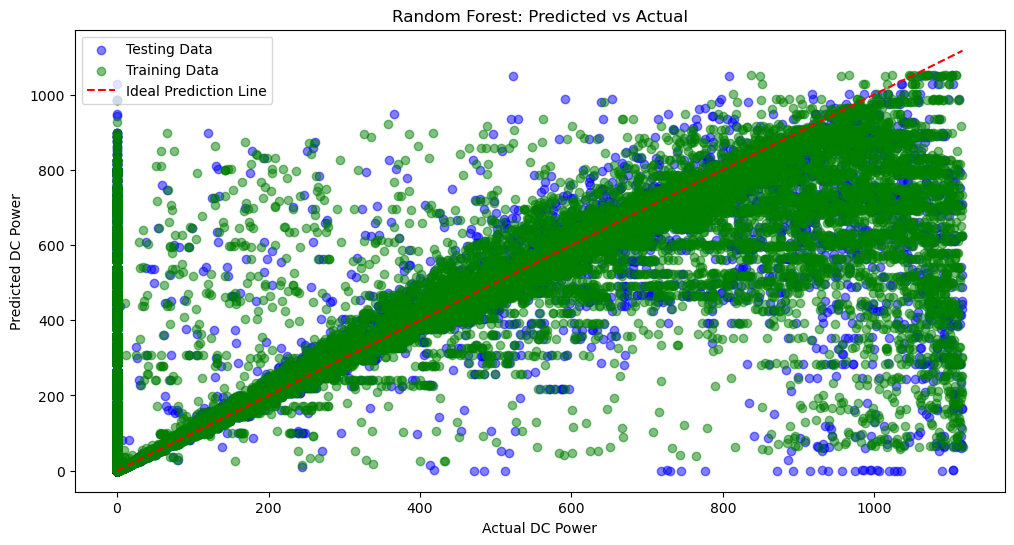

In [103]:
# Retrieve the best model
best_rf = rf_random.best_estimator_

# Predictions on train and test data
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Evaluate the model
metrics = {
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R²)'],
    'Training': [
        mean_absolute_error(y_train, y_train_pred),
        mean_squared_error(y_train, y_train_pred),
        np.sqrt(mean_squared_error(y_train, y_train_pred)),
        r2_score(y_train, y_train_pred)
    ],
    'Testing': [
        mean_absolute_error(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_pred),
        np.sqrt(mean_squared_error(y_test, y_test_pred)),
        r2_score(y_test, y_test_pred)
    ]
}

# Display metrics in a table
metrics_table = pd.DataFrame(metrics)
print(metrics_table)

# Visualize the scatter plot with predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, label='Testing Data', color='blue')
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Training Data', color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal Prediction Line')
plt.xlabel('Actual DC Power')
plt.ylabel('Predicted DC Power')
plt.title('Random Forest: Predicted vs Actual')
plt.legend()
plt.show()


#### **Analysis**
The model demonstrates a strong performance with an R² of 0.77 on the training set and 0.73 on the testing set, indicating good generalization. The MAE and RMSE values suggest relatively small prediction errors, with slightly higher error metrics on the test set, as expected in real-world scenarios. The overall low MSE and RMSE imply that the model effectively captures the data's underlying patterns, though some room for improvement remains.

-------------------------------------------

###  **Optimized Random Forest Regressor with Optuna Hyperparameter Tuning**

 **Model Working:**
This model is based on the **Random Forest Regressor**, a robust ensemble method for regression tasks. The hyperparameters of the model are tuned using **Optuna**, a framework for automatic optimization. **Cross-validation** is used to evaluate the model's performance, and **early stopping** through Optuna's pruner helps to terminate unpromising trials early, optimizing the search process.

**Deployment Efficiency Techniques:**
- **Optuna Hyperparameter Optimization**: Automates hyperparameter tuning, significantly reducing the time spent on manual tuning.
- **Parallel Processing**: Utilizes multiple CPU cores with `n_jobs=-1` to speed up cross-validation and model training.
- **Model Serialization**: Saves the trained model using **joblib** or **pickle** to quickly reload and use without the need for retraining.
- **Cloud Deployment**: Deploys the model on scalable platforms (e.g., AWS, Azure) for on-demand predictions and resource optimization.


In [77]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
import numpy as np

# Early stopping via Optuna's pruner
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 300, 350),
        'max_depth': trial.suggest_int('max_depth', 15, 25),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 5),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 3, 6),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 0.6, 0.8, 1.0]),
    }
    rf = RandomForestRegressor(random_state=42, **params)
    scores = cross_val_score(rf, X_train, y_train, cv=3, scoring='r2', n_jobs=-1)
    mean_score = np.mean(scores)
    trial.report(mean_score, step=0)  # Report intermediate results for pruning
    if trial.should_prune():  # Stop unpromising trials early
        raise optuna.TrialPruned()
    return mean_score

# Study with pruner for early stopping
study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=30, n_jobs=4)

# Extract the best model parameters
best_params = study.best_params
print(f"Best Parameters: {best_params}")

# Train and evaluate the final model
best_model = RandomForestRegressor(random_state=42, **best_params)
best_model.fit(X_train, y_train)
train_r2 = r2_score(y_train, best_model.predict(X_train))
test_r2 = r2_score(y_test, best_model.predict(X_test))
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")


[I 2024-12-03 18:16:28,245] A new study created in memory with name: no-name-1481fbbf-fd4c-4022-beab-3bb84987a89f


[I 2024-12-03 18:16:45,924] Trial 0 finished with value: 0.7293253213758492 and parameters: {'n_estimators': 332, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 0.6}. Best is trial 0 with value: 0.7293253213758492.
[I 2024-12-03 18:16:47,405] Trial 3 finished with value: 0.7309047964082204 and parameters: {'n_estimators': 337, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.7309047964082204.
[I 2024-12-03 18:16:55,743] Trial 2 finished with value: 0.7283491107886372 and parameters: {'n_estimators': 319, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 3 with value: 0.7309047964082204.
[I 2024-12-03 18:16:57,656] Trial 1 finished with value: 0.7276326179297538 and parameters: {'n_estimators': 314, 'max_depth': 23, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 3 with value: 0.7309047964082204.
[I 20

Best Parameters: {'n_estimators': 330, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}
Train R²: 0.7677
Test R²: 0.7293


#### **Evaluation Metrics**

In [78]:
# Predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluation metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Create a DataFrame for the evaluation results
results_df = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", 
               "Root Mean Squared Error (RMSE)", "R-squared (R²)"],
    "Training": [train_mae, train_mse, train_rmse, train_r2],
    "Testing": [test_mae, test_mse, test_rmse, test_r2]
})

# Format the table with pandas styling
styled_table = results_df.style.set_properties(**{
    'text-align': 'center', 
    'font-size': '12pt'
}).set_table_styles([ 
    {"selector": "thead th", "props": [("text-align", "center"), ("font-size", "14pt"), ("font-weight", "bold")]},
    {"selector": "tbody td", "props": [("text-align", "center")]},
]).set_caption("Evaluation Metrics")

# Display the styled table
styled_table

#### **Analysis**
The results show that the model's performance on the testing dataset is slightly worse than on the training dataset, as indicated by higher Mean Absolute Error (56.00 vs. 51.85) and Mean Squared Error (25045.51 vs. 21466.73). Despite this, the R-squared value remains relatively high, with a slight decrease from 0.77 in training to 0.73 in testing. These results suggest that while the model generalizes fairly well, there may be some overfitting or slight discrepancies between the training and testing sets.

#### **Visualization**

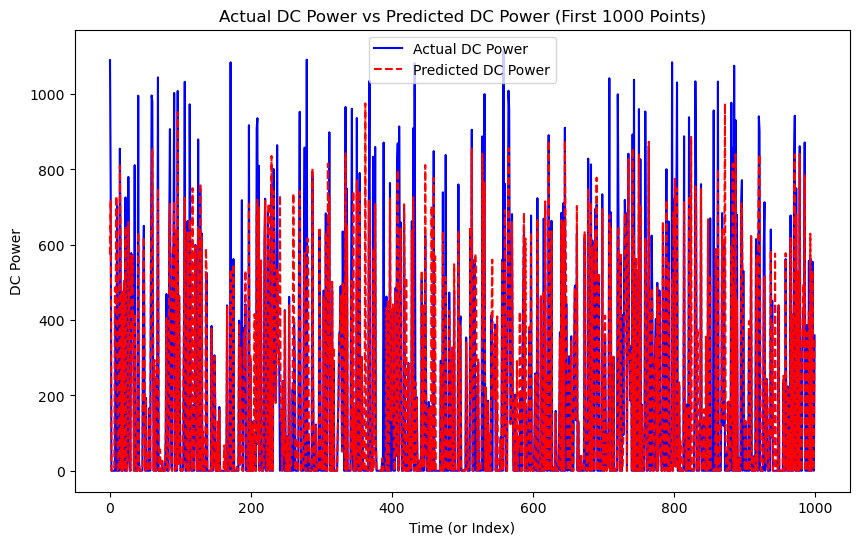

In [82]:
# Slice the first 1000 points
y_test_1000 = y_test[:1000]
y_test_pred_1000 = y_test_pred[:1000]

# Create a time index for the first 1000 points
time_index_1000 = np.arange(len(y_test_1000))

# Plot Actual vs Predicted values (First 1000 points)
plt.figure(figsize=(10, 6))
plt.plot(time_index_1000, y_test_1000, label="Actual DC Power", color='blue')
plt.plot(time_index_1000, y_test_pred_1000, label="Predicted DC Power", color='red', linestyle='--')

# Adding labels and title
plt.xlabel('Time (or Index)')
plt.ylabel('DC Power')
plt.title('Actual DC Power vs Predicted DC Power (First 1000 Points)')

# Adding a legend
plt.legend()

# Show the plot

plt.show()


------------------------------------------

### **vi. Evaluation and Comparison**

| **Model**                                  | **R² (Testing)** | **MAE (Testing)** | **RMSE (Testing)** | **Key Observations**                                                                                         |
|--------------------------------------------|------------------|-------------------|--------------------|--------------------------------------------------------------------------------------------------------------|
| **Linear Regression**                      | 0.47             | 123.96            | 221.41             | Poor performance, underfitting, with high error metrics (MAE & RMSE) and low R² score.                        |
| **Random Forest Regressor**                | 0.73             | 55.75             | 158.68             | Solid performance, lower error metrics compared to Linear Regression, slight overfitting.                     |
| **XGBoost Regressor**                      | 0.73             | 59.26             | 158.67             | Similar to Random Forest, slightly higher MAE & RMSE but still strong overall performance.                    |
| **Random Forest with RandomizedSearchCV**  | 0.73             | 56.00             | 158.26             | Minor improvements over baseline Random Forest, slight overfitting remains.                                   |
| **Optimized Random Forest with Optuna**    | 0.73             | 57.49             | 158.25             | Similar performance to Random Forest with marginal gains from hyperparameter optimization.                    |

#### **Critical Analysis & Model Ranking**

- **Best Performers:** **Random Forest** and **XGBoost** both show strong performance with R² values around 0.73, indicating good fit and predictive accuracy. Random Forest slightly edges out XGBoost with slightly lower error metrics.
- **Underperforming Model:** **Linear Regression** significantly underperforms with an R² of 0.47, highlighting its limitation in capturing non-linear relationships.
- **Hyperparameter Tuning Impact:** Tuning via **RandomizedSearchCV** and **Optuna** yields only modest improvements for Random Forest, suggesting that the baseline model is already well-optimized.
- **Overall Ranking:**
  - **1st:** **Random Forest Regressor** (best balance of performance and simplicity)
  - **2nd:** **XGBoost Regressor** (similar performance but more complex)
  - **3rd:** **Optimized Random Forest** and **RandomizedSearchCV** models (marginal improvements over baseline)
  - **4th:** **Linear Regression** (underfitting, poor model performance)

#### **Suggestions for Further Improvement**
1. **Feature Engineering:** Enhance model performance by identifying additional features or feature transformations.
2. **Ensemble Methods:** Combine Random Forest or XGBoost with other models to improve predictions.
3. **Fine-tuning XGBoost:** Experiment with more hyperparameters for XGBoost to extract better performance.
4. **Deep Learning Models:** For complex patterns, consider models like LSTM or MLP for more sophisticated learning.


---


### **vii. Conclused Findings**
The project successfully analyzed solar energy data to identify operational faults, evaluate inverters' performance, and predict future power generation using machine learning models. Random Forest emerged as the most balanced model for forecasting, demonstrating robust performance with low error metrics. Fault detection highlighted specific inverters and dates needing targeted interventions, enabling enhanced maintenance planning. Future improvements, such as advanced feature engineering, ensemble methods, or deep learning models, could further optimize results. Overall, the methodology provides actionable insights for effective solar plant management and energy yield optimization.
